#1. Loading Data 

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
import seaborn as sns
import geopandas as gpd

In [2]:
sns.set_theme()

In [3]:
#the full data
folder_path=r"C:\Users\hadee\Desktop\intro-final\Dataset 1 - Bussiness Activities"
data=[]
# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]


In [4]:
# Loop through each CSV file, read it into a DataFrame, and append it to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    data.append(df)

In [5]:
# Concatenate all DataFrames in the list into one DataFrame
cdf = pd.concat(data, ignore_index=True)

In [6]:
cdf.head()

,gadm_id,gadm_name,gadm_level,gadm0_name,gadm1_name,gadm2_name,country,business_vertical,activity_quantile,activity_percentage,crisis_ds,ds,Field,Label,Value
0,LUX,Luxembourg,0.0,Luxembourg,NaN,NaN,LU,Retail,0.550204,116.600990,2020-03-01,2020-03-01,NaN,NaN,NaN
1,LUX,Luxembourg,0.0,Luxembourg,NaN,NaN,LU,Home Services,0.641146,113.705543,2020-03-01,2020-03-01,NaN,NaN,NaN
2,LUX,Luxembourg,0.0,Luxembourg,NaN,NaN,LU,Local Events,0.663123,103.226699,2020-03-01,2020-03-01,NaN,NaN,NaN
3,LUX,Luxembourg,0.0,Luxembourg,NaN,NaN,LU,Manufacturing,0.504707,103.525641,2020-03-01,2020-03-01,NaN,NaN,NaN
4,CZE,Czech Republic,0.0,Czech Republic,NaN,NaN,CZ,All,0.583032,108.645654,2020-03-01,2020-03-01,NaN,NaN,NaN


In [7]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396577 entries, 0 to 2396576
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   gadm_id              object 
 1   gadm_name            object 
 2   gadm_level           float64
 3   gadm0_name           object 
 4   gadm1_name           float64
 5   gadm2_name           float64
 6   country              object 
 7   business_vertical    object 
 8   activity_quantile    float64
 9   activity_percentage  float64
 10  crisis_ds            object 
 11  ds                   object 
 12  Field                object 
 13  Label                object 
 14  Value                object 
dtypes: float64(5), object(10)
memory usage: 274.3+ MB


In [8]:
cdf.describe()

,gadm_level,gadm1_name,gadm2_name,activity_quantile,activity_percentage
count,2396549.0,0.0,0.0,2.396549e+06,2.396549e+06
mean,0.0,NaN,NaN,4.333909e-01,1.158843e+02
std,0.0,NaN,NaN,2.134659e-01,5.706403e+01
min,0.0,NaN,NaN,0.000000e+00,0.000000e+00
25%,0.0,NaN,NaN,2.789940e-01,8.965291e+01
50%,0.0,NaN,NaN,4.345785e-01,1.094090e+02
75%,0.0,NaN,NaN,5.814944e-01,1.314520e+02
max,0.0,NaN,NaN,1.000000e+00,3.215491e+03


In [9]:
#1
list_country=cdf['gadm_name'].unique()
len(list_country)

221

In [10]:
cdf['country'].nunique()

216

In [11]:
#2

date_counts=cdf.groupby(['country', 'business_vertical'])['ds'].nunique().reset_index()


In [12]:
print(date_counts)

     country             business_vertical    ds
0         AD                           All  1004
1         AD   Business & Utility Services  1004
2         AD  Grocery & Convenience Stores  1004
3         AD                 Home Services  1004
4         AD            Lifestyle Services  1004
...      ...                           ...   ...
2345      ZW         Professional Services  1004
2346      ZW                   Public Good  1004
2347      ZW                   Restaurants  1004
2348      ZW                        Retail  1004
2349      ZW                        Travel  1004

[2350 rows x 3 columns]


In [13]:
#counting missing values:
missing_values = cdf.isnull().sum()
print(missing_values)

gadm_id                     28
gadm_name                   28
gadm_level                  28
gadm0_name                  28
gadm1_name             2396577
gadm2_name             2396577
country                  38180
business_vertical           28
activity_quantile           28
activity_percentage         28
crisis_ds                   28
ds                          28
Field                  2396549
Label                  2396549
Value                  2396549
dtype: int64


In [14]:
cdf.isna().sum()/cdf.shape[0]*100

gadm_id                  0.001168
gadm_name                0.001168
gadm_level               0.001168
gadm0_name               0.001168
gadm1_name             100.000000
gadm2_name             100.000000
country                  1.593106
business_vertical        0.001168
activity_quantile        0.001168
activity_percentage      0.001168
crisis_ds                0.001168
ds                       0.001168
Field                   99.998832
Label                   99.998832
Value                   99.998832
dtype: float64

In [15]:
cdf['gadm1_name'].sum()

0.0

In [16]:
cdf['gadm2_name'].sum()

0.0

In [17]:
cdf['Label'].isnull().sum()

2396549

In [18]:
cdf['Field'].isnull().sum()

2396549

In [19]:
cdf['Value'].isnull().sum()

2396549

In [20]:
len(cdf)

2396577

In [21]:
#Dublication
duplicate_rows = cdf[cdf.duplicated()].sum()
print(duplicate_rows)

gadm_id                0.0
gadm_name              0.0
gadm_level             0.0
gadm0_name             0.0
gadm1_name             0.0
gadm2_name             0.0
country                0.0
business_vertical      0.0
activity_quantile      0.0
activity_percentage    0.0
crisis_ds              0.0
ds                     0.0
Field                  0.0
Label                  0.0
Value                  0.0
dtype: float64


In [22]:
#cleaning missing data
cdf1=cdf.drop(['gadm1_name', 'gadm2_name','Field', 'Label','Value'], axis=1).copy()


In [23]:
# Drop rows with null values in the column
#cdf.dropna(subset=['column_name'], inplace=True)

In [24]:
# Interpolate null values
cdf2=cdf1['ds'].interpolate(method='time', inplace=True)

In [25]:
# Select non-null values in the column
aq = cdf1['activity_quantile'].dropna().copy()

In [26]:
aqp = cdf1['activity_percentage'].dropna().copy()

In [27]:
print(aqp)

0          116.600990
1          113.705543
2          103.226699
3          103.525641
4          108.645654
              ...    
2396544    435.975067
2396545    151.621622
2396546    129.951923
2396547     32.553191
2396548    137.307692
Name: activity_percentage, Length: 2396549, dtype: float64


#outliners

In [28]:
#data =aq
data=aq
mean= np.mean(data)
std = np.std(data)
 
threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
        
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", len(outliers))

Mean:  0.43339093159050435

Standard deviation:  0.21346587404785172

Outliers  :  0


In [29]:
mean = np.mean(cdf1['activity_percentage'])
std = np.std(cdf1['activity_percentage'])

threshold = 3
outliers = []
outliers_index = []
for index, row in cdf1.iterrows():
    if pd.notnull(row['activity_percentage']):  # Skip rows with missing values
        z_score = (row['activity_percentage'] - mean) / std
        if abs(z_score) > threshold:
            outliers.append(row['activity_percentage'])
            outliers_index.append(row['ds'])

outliers_df = pd.DataFrame({'ds': outliers_index, 'activity_percentage': outliers})
outliers_df.set_index('ds', inplace=True)



In [30]:
print("Mean: ", mean)
print("\nStandard deviation: ", std)
print("\nOutliers: ", outliers_df)

Mean:  115.88433277654246

Standard deviation:  57.064019908608344

Outliers:              activity_percentage
ds                             
2020-03-01           334.044174
2020-03-01           287.111111
2020-03-01           355.964467
2020-03-01           315.704618
2020-03-01           290.322581
...                         ...
2022-11-29           296.972050
2022-11-29           353.156823
2022-11-29           371.659919
2022-11-29           322.836538
2022-11-29           435.975067

[30556 rows x 1 columns]


In [31]:
# Scatter plot

# Convert the 'timestamp' column to datetime if it's not already in the datetime format
cdf1['ds'] = pd.to_datetime(cdf1['ds'])

# Sort the DataFrame by the 'timestamp' column
#data.sort_values('timestamp', inplace=True)

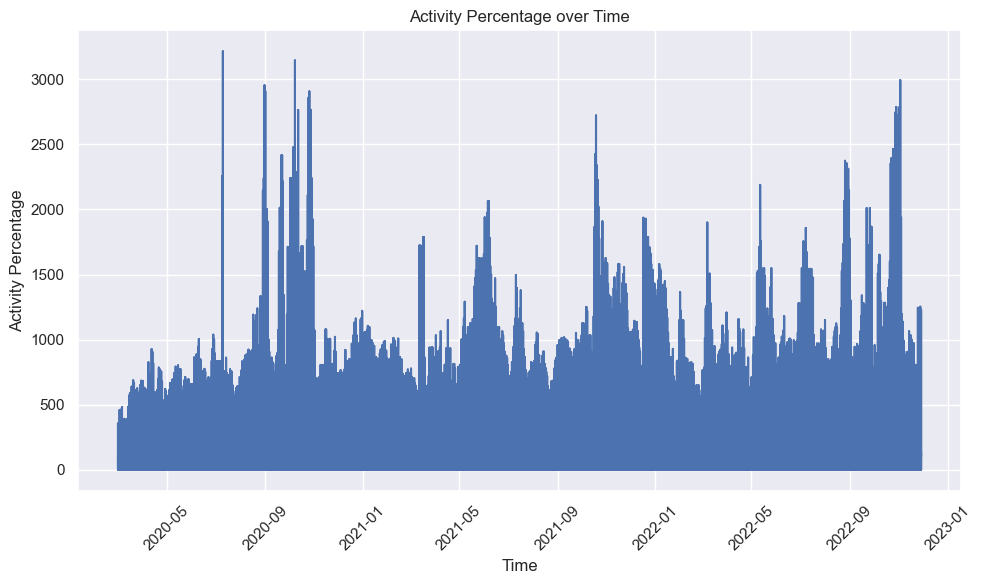

In [32]:
# Plotting the 'activity_percentage' over time
plt.figure(figsize=(10, 6))
plt.plot(cdf1['ds'], cdf1['activity_percentage'],marker='', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Activity Percentage')
plt.title('Activity Percentage over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

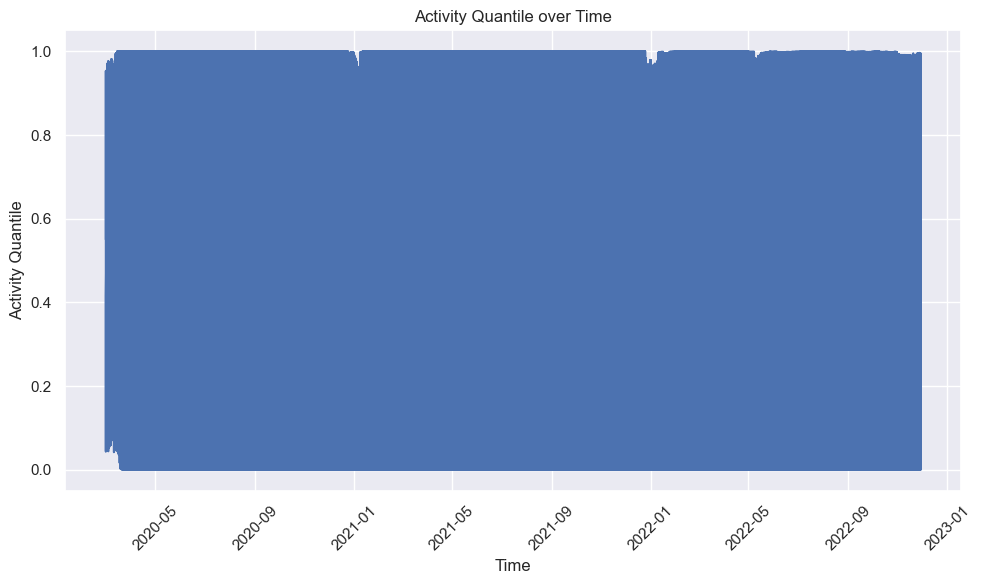

In [33]:
# Plotting the 'activity_percentage' over time
plt.figure(figsize=(10, 6))
plt.plot(cdf1['ds'], cdf1['activity_quantile'],linestyle=None)
plt.xlabel('Time')
plt.ylabel('Activity Quantile')
plt.title('Activity Quantile over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

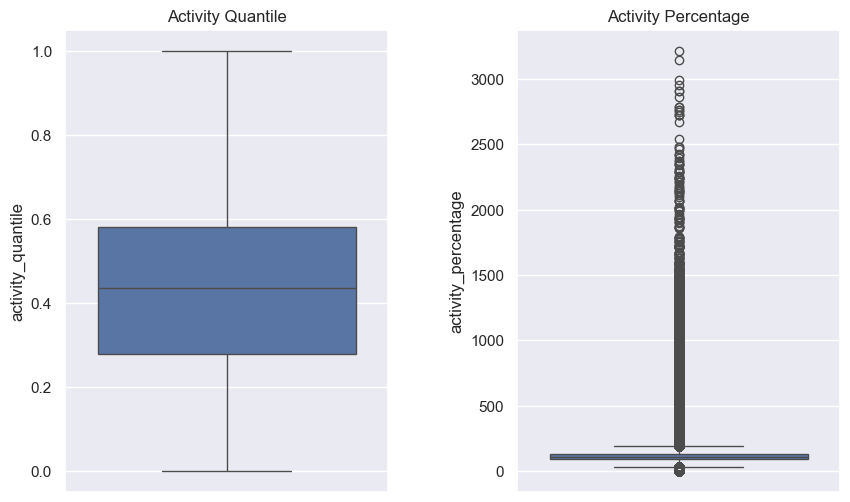

In [34]:

# Creating a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first box plot for 'activity_quantile'
sns.boxplot(cdf1['activity_quantile'], ax=ax1)
ax1.set_title('Activity Quantile')

# Plotting the second box plot for 'activity_percentage'
sns.boxplot(cdf1['activity_percentage'], ax=ax2)
ax2.set_title('Activity Percentage')

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plots
plt.show()
plt.close()

In [35]:

# Assuming you have a DataFrame named 'data' with the required columns

# Summary statistics
quantile_stats = cdf1['activity_quantile'].describe()
percentage_stats = cdf1['activity_percentage'].describe()

quantile_stats

count    2.396549e+06
mean     4.333909e-01
std      2.134659e-01
min      0.000000e+00
25%      2.789940e-01
50%      4.345785e-01
75%      5.814944e-01
max      1.000000e+00
Name: activity_quantile, dtype: float64

In [36]:
percentage_stats

count    2.396549e+06
mean     1.158843e+02
std      5.706403e+01
min      0.000000e+00
25%      8.965291e+01
50%      1.094090e+02
75%      1.314520e+02
max      3.215491e+03
Name: activity_percentage, dtype: float64

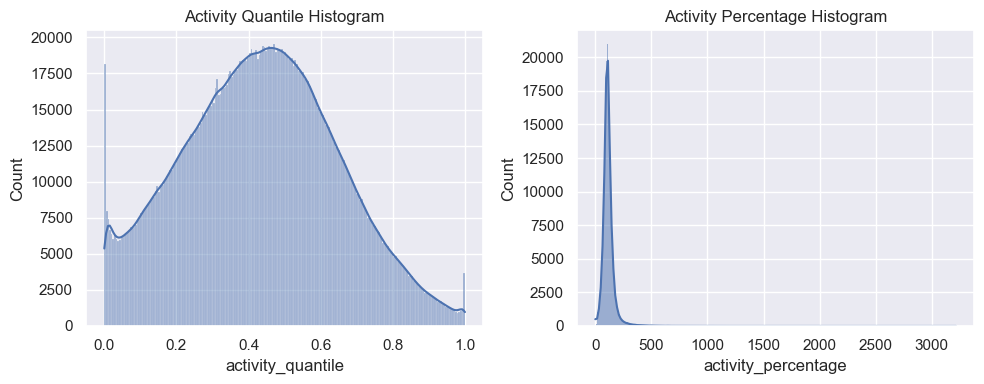

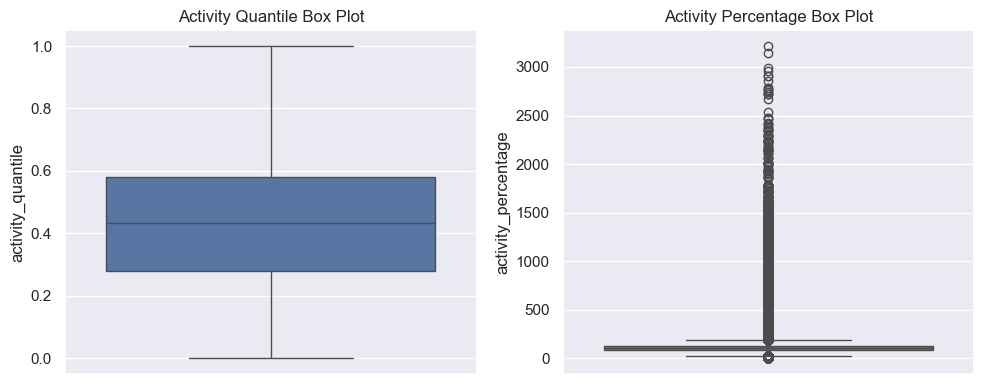

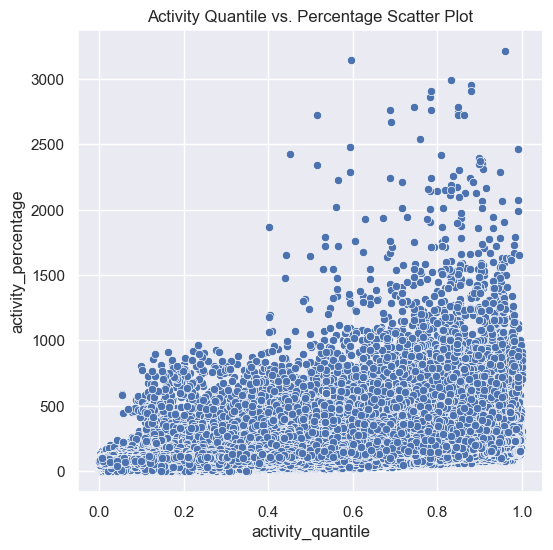

In [37]:
# Histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(cdf1['activity_quantile'], kde=True)
plt.title('Activity Quantile Histogram')

plt.subplot(1, 2, 2)
sns.histplot(cdf1['activity_percentage'], kde=True)
plt.title('Activity Percentage Histogram')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(cdf1['activity_quantile'])
plt.title('Activity Quantile Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(cdf1['activity_percentage'])
plt.title('Activity Percentage Box Plot')

plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='activity_quantile', y='activity_percentage', data=cdf1)
plt.title('Activity Quantile vs. Percentage Scatter Plot')

plt.show()

In [38]:
from scipy.stats import skew

In [39]:
# Compute the skewness of the 'activity_quantile' column
quantile_skew = skew(cdf1['activity_quantile'])

# Compute the skewness of the 'activity_percentage' column
percentage_skew = skew(cdf1['activity_percentage'])

print("Skewness of activity_quantile:", quantile_skew)
print("Skewness of activity_percentage:", percentage_skew)

Skewness of activity_quantile: nan
Skewness of activity_percentage: nan


features understanding
Boxplot
KDE
Histogram

Text(0, 0.5, 'Business Vertical')

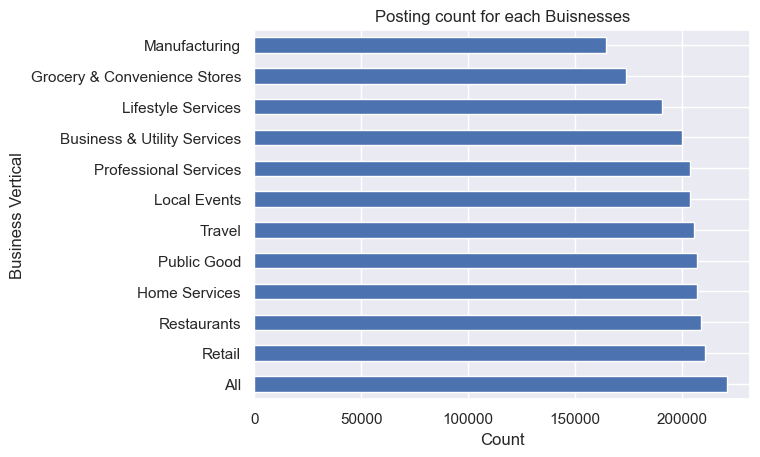

In [40]:
ax= cdf1['business_vertical'].value_counts().plot(kind='barh',title='Posting count for each Buisnesses')
ax.set_xlabel('Count')
ax.set_ylabel('Business Vertical')

<Axes: title={'center': 'Activity Quantile Distribution'}, ylabel='Frequency'>

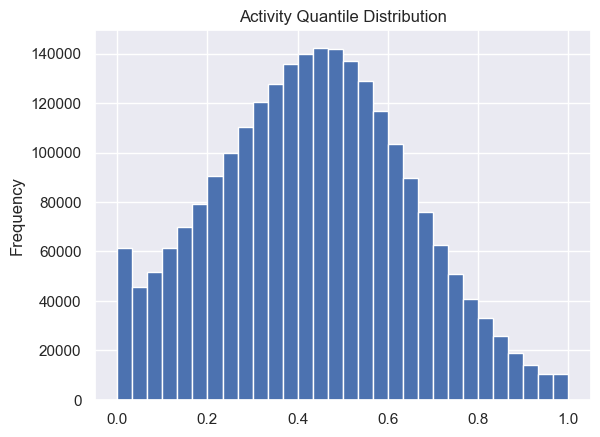

In [41]:
cdf1['activity_quantile'].plot(kind='hist',bins=30 ,title='Activity Quantile Distribution')

<Axes: title={'center': 'Activity Percentage Distribution'}, ylabel='Frequency'>

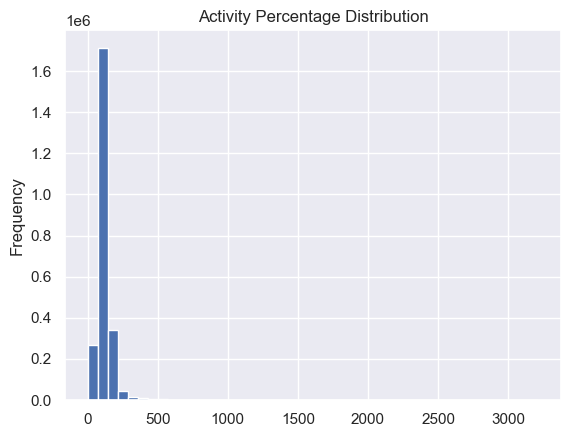

In [42]:
cdf1['activity_percentage'].plot(kind='hist',bins=45 ,title='Activity Percentage Distribution')

<Axes: title={'center': 'Activity Quantile Distribution'}, ylabel='Density'>

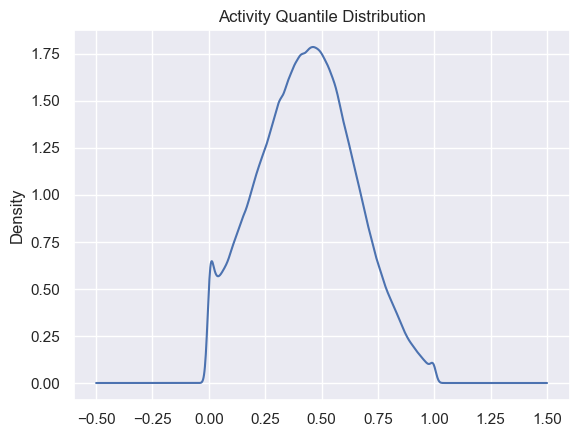

In [43]:
cdf1['activity_quantile'].plot(kind='kde' ,title='Activity Quantile Distribution')

Feature relationships:

In [44]:
cdf1.head()

,gadm_id,gadm_name,gadm_level,gadm0_name,country,business_vertical,activity_quantile,activity_percentage,crisis_ds,ds
0,LUX,Luxembourg,0.0,Luxembourg,LU,Retail,0.550204,116.600990,2020-03-01,2020-03-01
1,LUX,Luxembourg,0.0,Luxembourg,LU,Home Services,0.641146,113.705543,2020-03-01,2020-03-01
2,LUX,Luxembourg,0.0,Luxembourg,LU,Local Events,0.663123,103.226699,2020-03-01,2020-03-01
3,LUX,Luxembourg,0.0,Luxembourg,LU,Manufacturing,0.504707,103.525641,2020-03-01,2020-03-01
4,CZE,Czech Republic,0.0,Czech Republic,CZ,All,0.583032,108.645654,2020-03-01,2020-03-01


In [45]:
df_corr=cdf1[['activity_quantile','activity_percentage']].corr()

<Axes: >

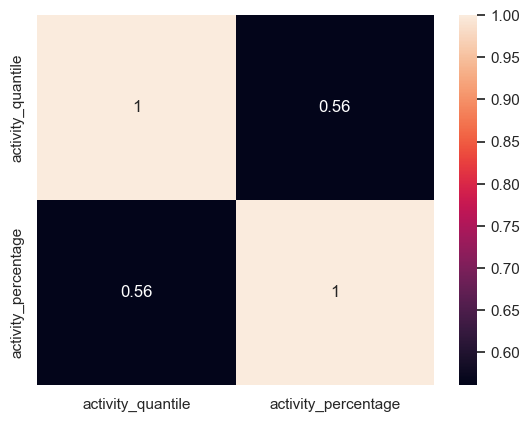

In [46]:
sns.heatmap(df_corr,annot=True)

In [47]:
#step3:ask Qustions 

In [48]:
cdf1['gadm0_name'].value_counts()

Luxembourg      12048
Belgium         12048
Mongolia        12048
Nicaragua       12048
Grenada         12048
                ...  
Kiribati         1004
Saint Helena     1004
Montserrat       1004
Eritrea          1004
Vatican City     1004
Name: gadm0_name, Length: 220, dtype: int64

<Axes: title={'center': 'Avarage Activity rate by Country'}, ylabel='gadm0_name'>

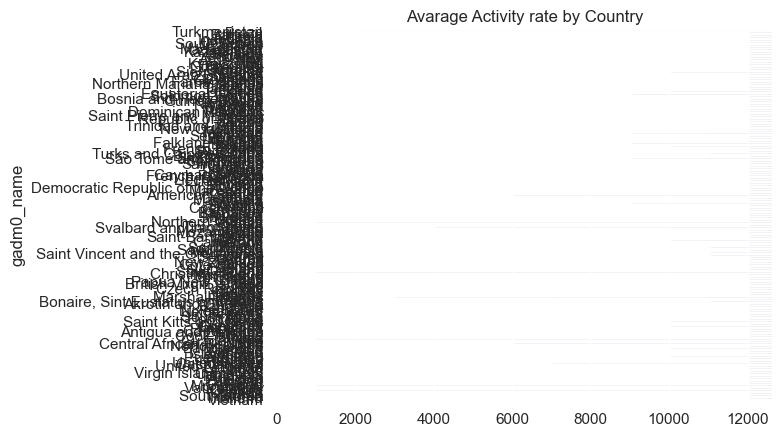

In [49]:
cdf1.groupby('gadm0_name')['activity_quantile'].agg(['mean','count'])\
.sort_values('mean')['count']\
.plot(kind='barh',title='Avarage Activity rate by Country')

In [50]:
cdf1['business_vertical'].unique()

array(['Retail', 'Home Services', 'Local Events', 'Manufacturing', 'All',
       'Public Good', 'Travel', 'Lifestyle Services',
       'Business & Utility Services', 'Professional Services',
       'Grocery & Convenience Stores', 'Restaurants', nan], dtype=object)

In [51]:
cdf1['gadm0_name'].unique()

array(['Luxembourg', 'Czech Republic', 'Germany', 'Malta',
       'Virgin Islands, U.S.', 'Anguilla', 'Lesotho', 'Gabon', 'Kiribati',
       'South Africa', 'Bahrain', 'Slovenia', 'Liberia', 'Aruba',
       'Saint Pierre and Miquelon', 'Sint Maarten', 'Equatorial Guinea',
       'Saint Helena', 'Rwanda', 'Andorra', 'Jersey', 'Gibraltar',
       'Brunei', 'Swaziland', 'Tonga', 'Zimbabwe', 'Djibouti',
       'Northern Cyprus', 'Benin', 'Central African Republic',
       'Guatemala', 'New Caledonia', 'United Arab Emirates', 'Latvia',
       'Niue', 'Saint Vincent and the Grenadines', 'Switzerland',
       'French Guiana', 'Comoros', 'Bulgaria', 'Lithuania', 'Laos',
       'Macedonia', 'Turks and Caicos Islands', 'American Samoa', 'Niger',
       'Serbia', 'Nepal', 'Turkey', 'Papua New Guinea', 'Qatar',
       'Netherlands', 'Hungary', 'Curaçao', 'Angola', 'Kyrgyzstan',
       'Caspian Sea', 'Ecuador', 'Mozambique', 'Armenia', 'Gambia',
       'Trinidad and Tobago', 'Akrotiri and Dhekelia'

In [194]:
# Convert the 'date' column to datetime format
cdf1['ds'] = pd.to_datetime(cdf1['ds'], format='%Y-%m-%d')

In [195]:
# Define the chosen countries and business types
countries = ['Philippines ' ]
business_types = ['Retail', 'Manufacturing']

In [196]:
filtered_data = cdf1[(cdf1['gadm_name'].isin(countries)) & (cdf1['business_vertical'].isin(business_types))]

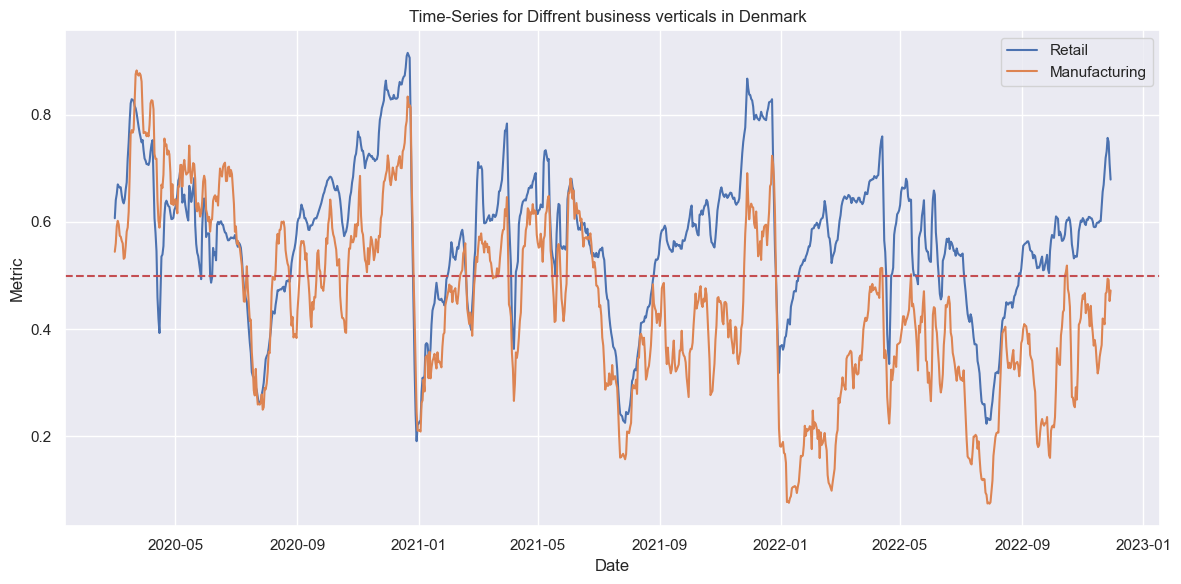

In [198]:
# Create time-series plots
fig, ax = plt.subplots(figsize=(12, 6))
for country in countries:
    for business in business_types:
        ex= filtered_data[(filtered_data['gadm_name'] == country) & (filtered_data['business_vertical'] == business)]
        filtered_data.groupby(['ds', 'gadm0_name'])[['activity_quantile', 'activity_percentage']].mean().reset_index()
        ax.plot(ex['ds'] , ex['activity_quantile'] , label=f'{business}')
# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--')                 
ax.set_xlabel('Date')
ax.set_ylabel('Metric')
ax.set_title('Time-Series for Diffrent business verticals in Philippines   ')
plt.tight_layout()
ax.legend()        
plt.show()

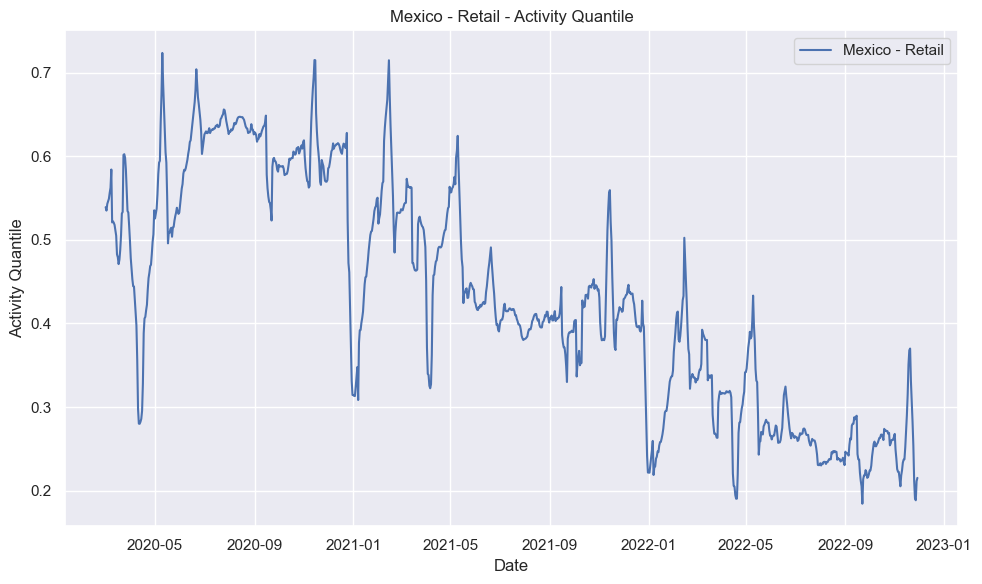

In [115]:
import matplotlib.pyplot as plt

# Select country and business vertical
selected_country = 'Mexico'
selected_business = 'Retail'

# Filter data for the selected country and business vertical
filtered_data = cdf1[(cdf1['gadm_name'] == selected_country) & (cdf1['business_vertical'] == selected_business)]
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot activity_quantile
ax.plot(filtered_data['ds'], filtered_data['activity_quantile'], label=f'{selected_country} - {selected_business}')
ax.set_title(f'{selected_country} - {selected_business} - Activity Quantile')
ax.set_ylabel('Activity Quantile')
ax.set_xlabel('Date')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

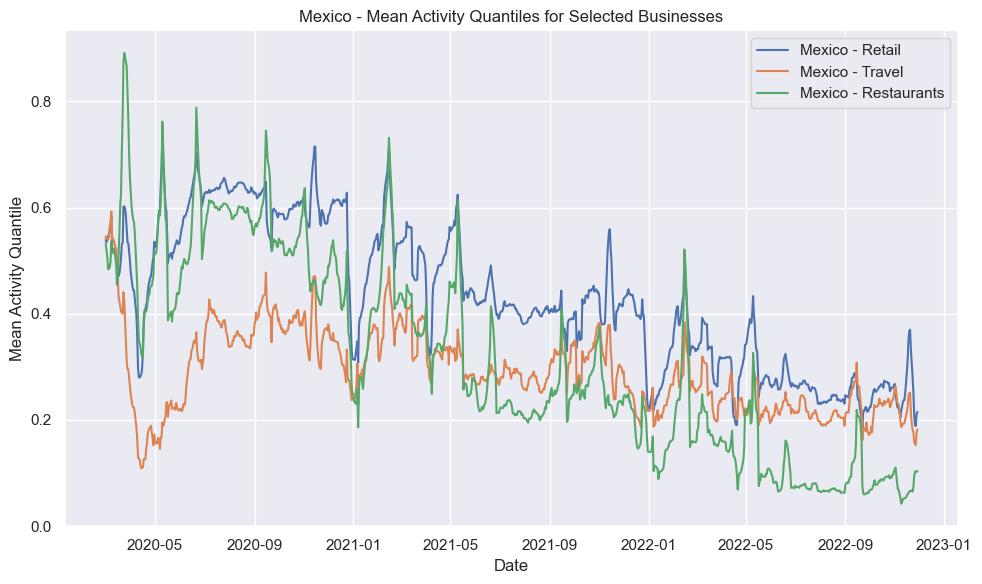

In [121]:
import matplotlib.pyplot as plt

# Select country
selected_country = 'Mexico'

# Select three business verticals
selected_businesses = ['Retail', 'Travel', 'Restaurants']

# Filter data for the selected country and business verticals
filtered_data = cdf1[(cdf1['gadm_name'] == selected_country) & (cdf1['business_vertical'].isin(selected_businesses))]

# Group by 'ds' and calculate mean of 'activity_quantile' for each business vertical
grouped_data = filtered_data.groupby(['ds', 'business_vertical'])['activity_quantile'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot activity_quantile for each business vertical
for business in selected_businesses:
    business_data = grouped_data[grouped_data['business_vertical'] == business]
    ax.plot(business_data['ds'], business_data['activity_quantile'], label=f'{selected_country} - {business}')

ax.set_title(f'{selected_country} - Mean Activity Quantiles for Selected Businesses')
ax.set_ylabel('Mean Activity Quantile')
ax.set_xlabel('Date')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\hadee\AppData\Local\Temp\ipykernel_28808\2181682101.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['ds'].dt.to_period('M').astype(str)


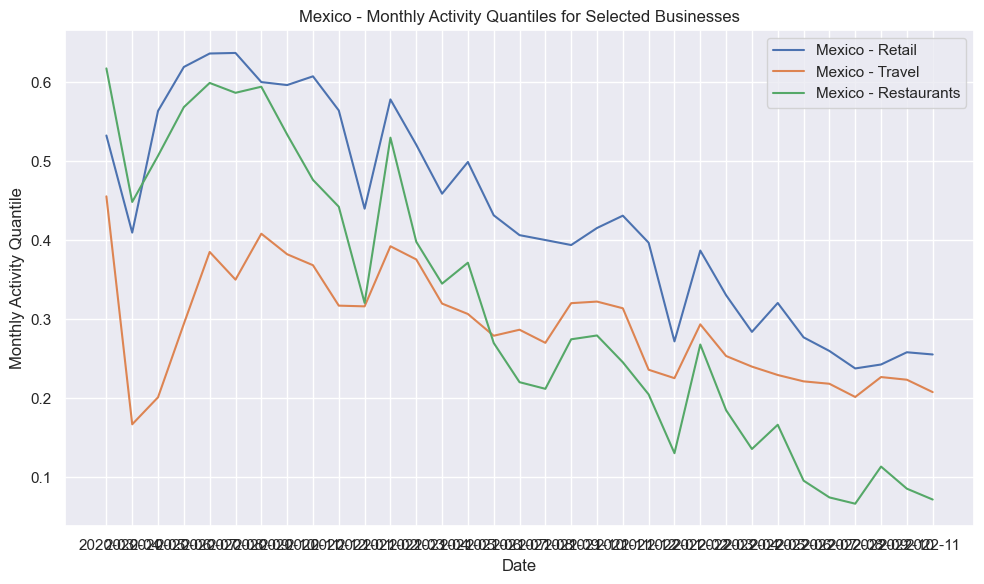

In [130]:
# Select country
selected_country = 'Mexico'

# Select three business verticals
selected_businesses = ['Retail', 'Travel', 'Restaurants']

# Filter data for the selected country and business verticals
filtered_data = cdf1[(cdf1['gadm_name'] == selected_country) & (cdf1['business_vertical'].isin(selected_businesses))]

# Convert 'ds' to datetime format
#filtered_data['ds'] = pd.to_datetime(filtered_data['ds'])

# Extract month from the date
filtered_data['month'] = filtered_data['ds'].dt.to_period('M').astype(str)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot activity_quantile for each business vertical
for business in selected_businesses:
    business_data = filtered_data[filtered_data['business_vertical'] == business]
    grouped_data = business_data.groupby('month')['activity_quantile'].mean().reset_index()
    
    ax.plot(grouped_data['month'], grouped_data['activity_quantile'], label=f'{selected_country} - {business}')

ax.set_title(f'{selected_country} - Monthly Activity Quantiles for Selected Businesses')
ax.set_ylabel('Monthly Activity Quantile')
ax.set_xlabel('Date')
ax.legend()
# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--')    
# Show the plot
plt.tight_layout()
plt.show()

C:\Users\hadee\AppData\Local\Temp\ipykernel_28808\2903571725.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ds'] = pd.to_datetime(filtered_data['ds'])
C:\Users\hadee\AppData\Local\Temp\ipykernel_28808\2903571725.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['ds'].dt.to_period('M').astype(str)
C:\Users\hadee\AppData\Local\Temp\ipykernel_28808\2903571725.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

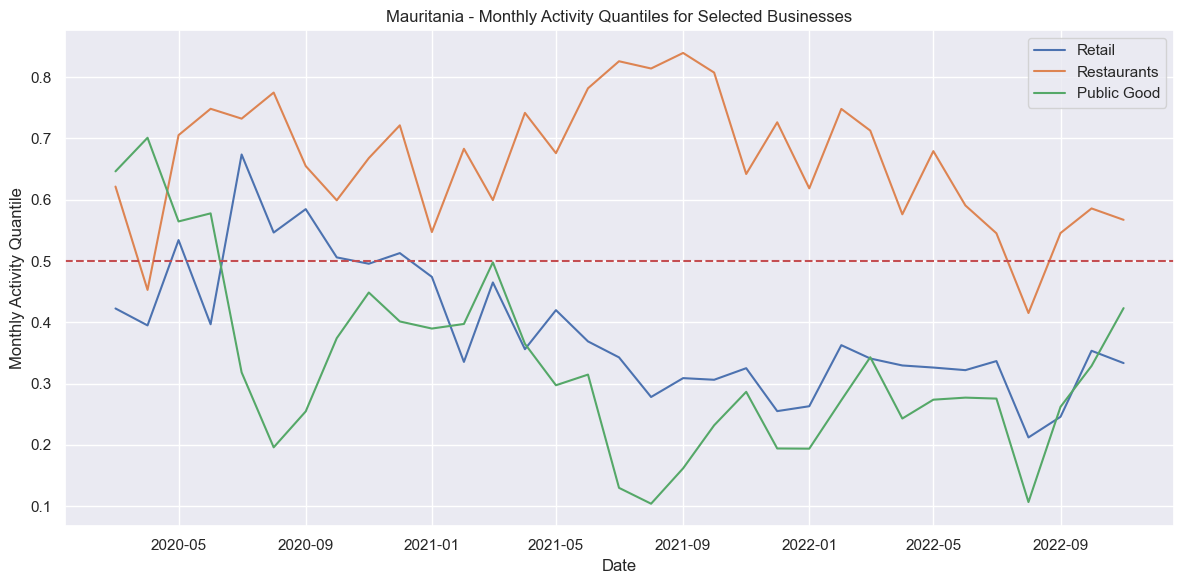

In [207]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter

# Select country
selected_country = 'Mauritania'

# Select three business verticals
#selected_businesses = [ 'Business & Utility Services', 'Professional Services','Travel', 'Lifestyle Services','Local Events']
#selected_businesses = [ 'Travel', 'Local Events']#'Business & Utility Services',
selected_businesses = [ 'Retail',  'Restaurants','Public Good']# 'Manufacturing', 'Grocery & Convenience Stores', 

# Filter data for the selected country and business verticals
filtered_data = cdf1[(cdf1['gadm_name'] == selected_country) & (cdf1['business_vertical'].isin(selected_businesses))]

# Convert 'ds' to datetime format
filtered_data['ds'] = pd.to_datetime(filtered_data['ds'])

# Extract month from the date and convert it to string
filtered_data['month'] = filtered_data['ds'].dt.to_period('M').astype(str)
filtered_data['month']=pd.to_datetime(filtered_data['month'])
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot activity_quantile for each business vertical
for business in selected_businesses:
    business_data = filtered_data[filtered_data['business_vertical'] == business]
    grouped_data = business_data.groupby('month')['activity_quantile'].mean().reset_index()
    
    ax.plot(grouped_data['month'], grouped_data['activity_quantile'], label=f'{business}')
# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--')
ax.set_title(f'{selected_country} - Monthly Activity Quantiles for Selected Businesses')
ax.set_ylabel('Monthly Activity Quantile')
ax.set_xlabel('Date')
ax.legend()



# Show the plot
plt.tight_layout()
plt.show()


In [128]:
# Extract month from the date
cdf1['month'] = cdf1['ds'].dt.to_period('M')

In [125]:
cdf1['month']

0          2020-03
1          2020-03
2          2020-03
3          2020-03
4          2020-03
            ...   
2396572        NaT
2396573        NaT
2396574        NaT
2396575        NaT
2396576        NaT
Name: month, Length: 2396577, dtype: period[M]

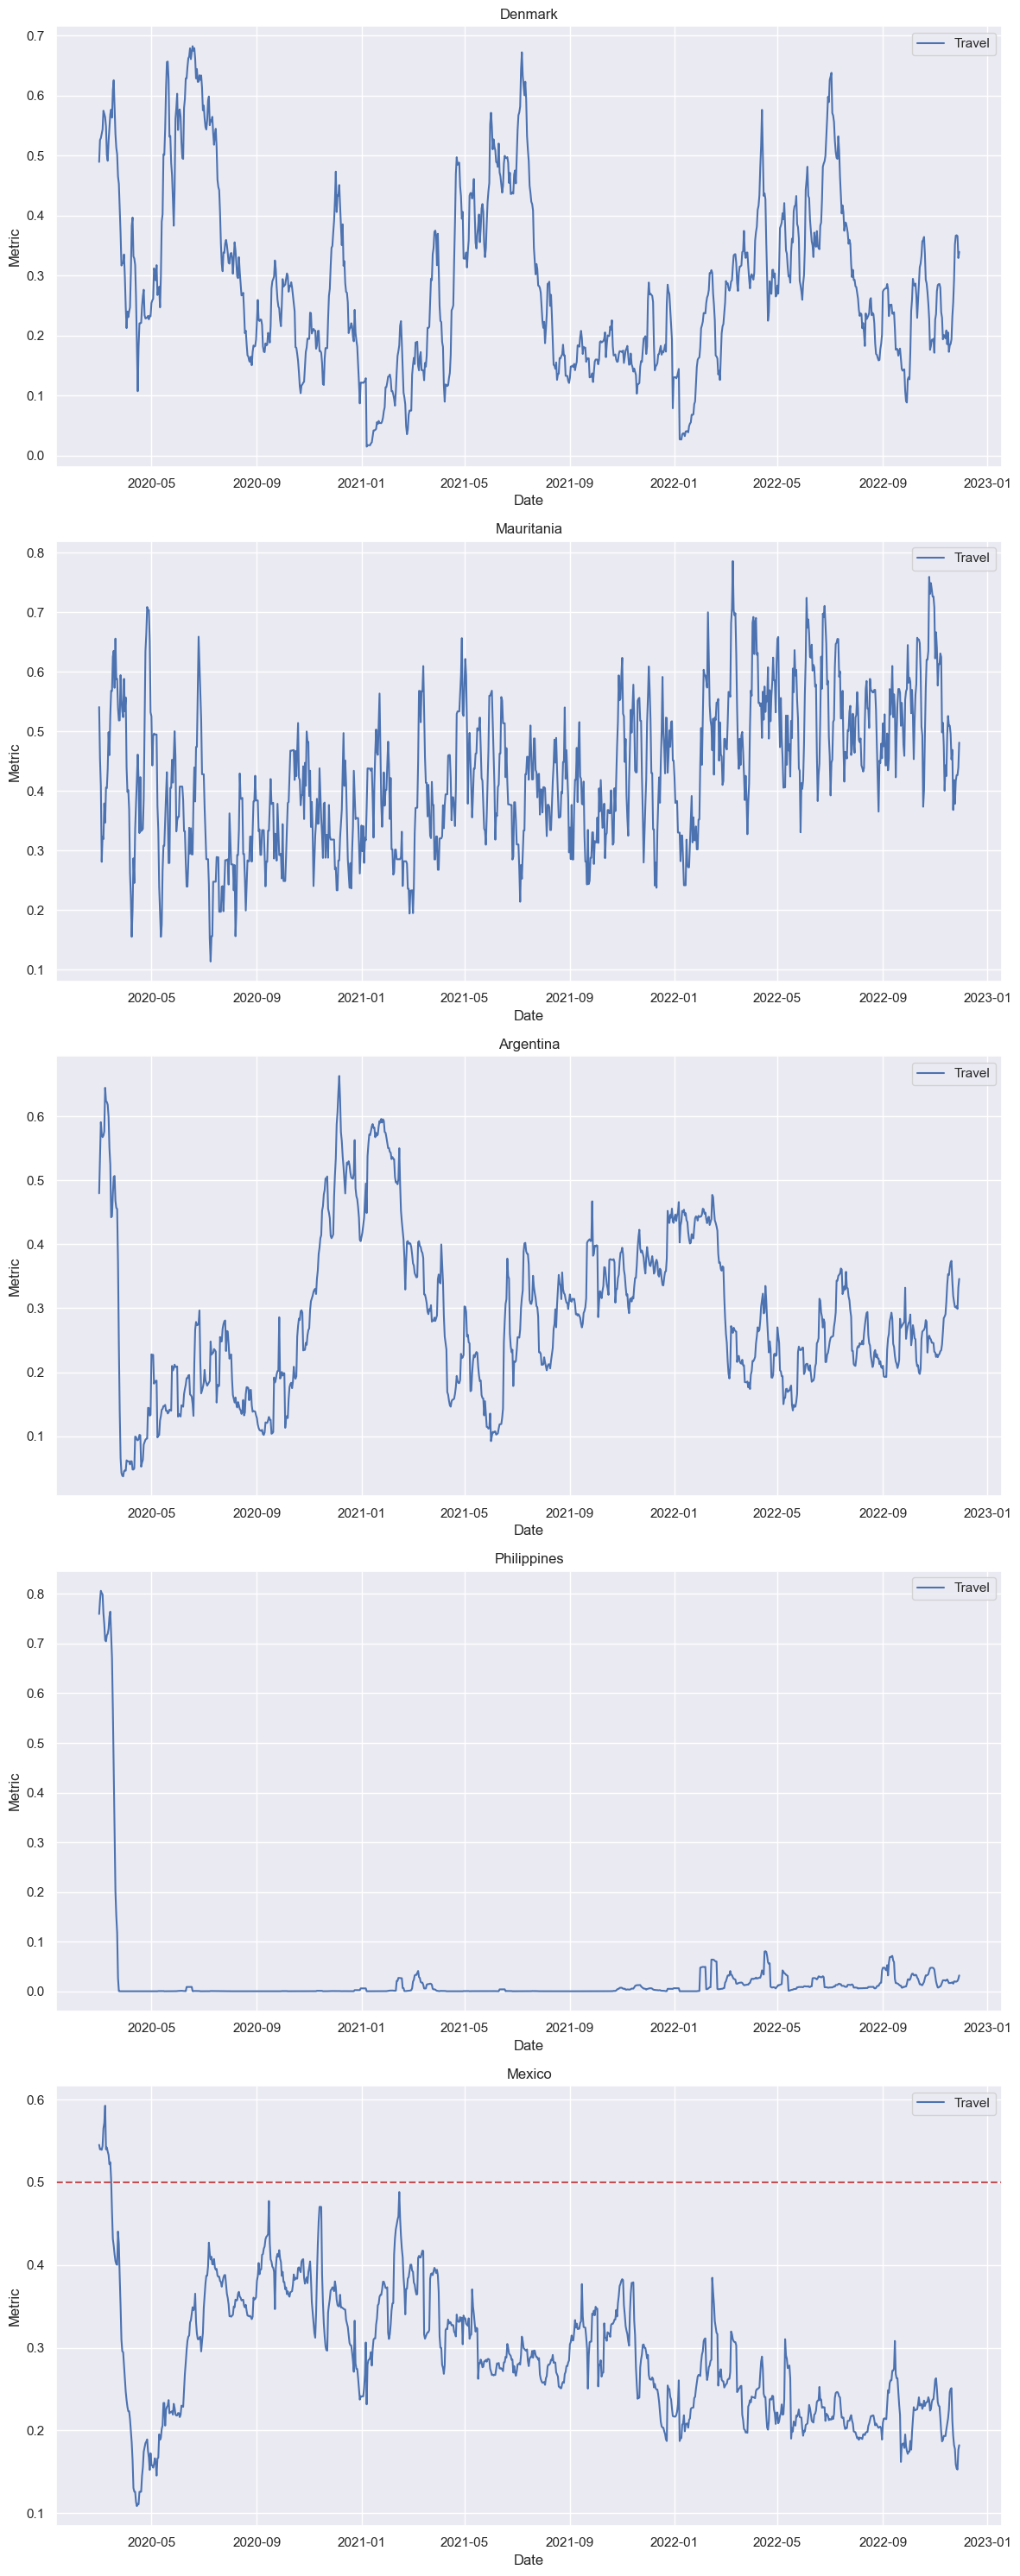

In [56]:
# Define the chosen countries and business types
countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']
business_types = ['Travel']#'Travel', 'Restaurants'
filtered_data = cdf1[(cdf1['gadm_name'].isin(countries)) & (cdf1['business_vertical'].isin(business_types))]

# Create subplots for each country
fig, axs = plt.subplots(len(countries), 1, figsize=(12, 6 * len(countries)), sharex=False)

for i, country in enumerate(countries):
    ax = axs[i]
    ax.set_title(country)
    
    for business in business_types:
        ex = filtered_data[(filtered_data['gadm_name'] == country) & (filtered_data['business_vertical'] == business)]
        ax.plot(ex['ds'], ex['activity_quantile'], label=business)

    ax.set_ylabel('Metric')
    ax.set_xlabel('Date')
    ax.legend()
    # Plotting the line y=0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')


plt.tight_layout()
plt.show()
plt.close()

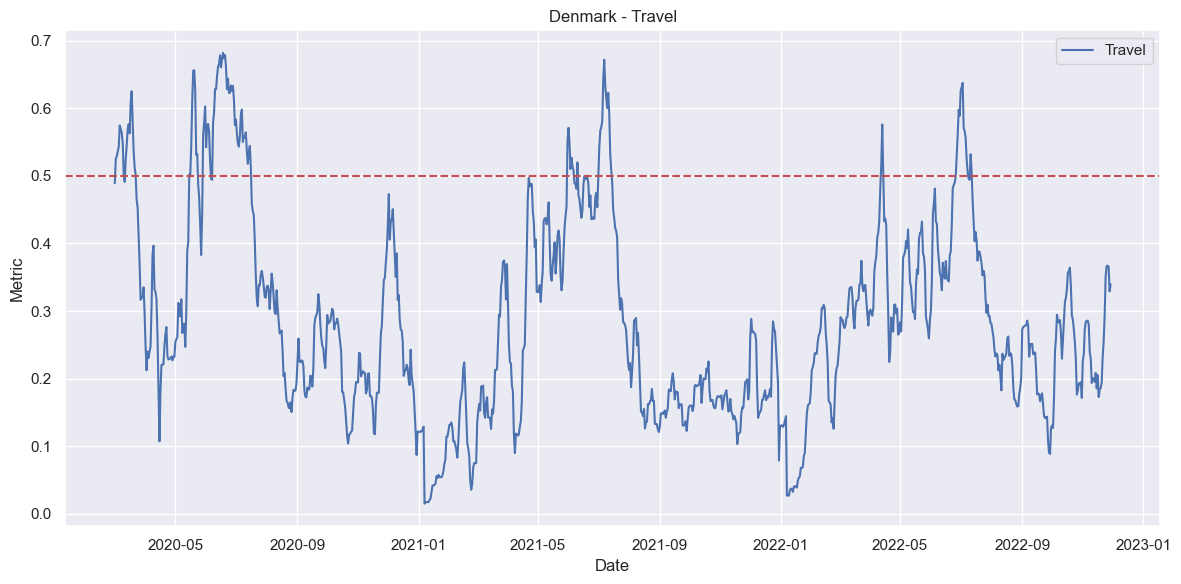

In [57]:
# Define the chosen country and business type
country = 'Denmark'
business_type = 'Travel'  # or 'Restaurants'

# Filter data for the chosen country and business type
filtered_data = cdf1[(cdf1['gadm_name'] == country) & (cdf1['business_vertical'] == business_type)]

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for the chosen country and business type
ax.set_title(f'{country} - {business_type}')
ax.plot(filtered_data['ds'], filtered_data['activity_quantile'], label=business_type)

ax.set_ylabel('Metric')
ax.set_xlabel('Date')
ax.legend()

# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')

plt.tight_layout()
plt.show()
plt.close()

In [58]:
filtered_data

,gadm_id,gadm_name,gadm_level,gadm0_name,country,business_vertical,activity_quantile,activity_percentage,crisis_ds,ds
1996,DNK,Denmark,0.0,Denmark,DK,Travel,0.489274,100.051397,2020-03-01,2020-03-01
2911,DNK,Denmark,0.0,Denmark,DK,Travel,0.525906,101.745133,2020-03-01,2020-03-02
6276,DNK,Denmark,0.0,Denmark,DK,Travel,0.529025,101.422517,2020-03-01,2020-03-03
9193,DNK,Denmark,0.0,Denmark,DK,Travel,0.536214,103.842139,2020-03-01,2020-03-04
11140,DNK,Denmark,0.0,Denmark,DK,Travel,0.543503,104.809988,2020-03-01,2020-03-05
...,...,...,...,...,...,...,...,...,...,...
2386257,DNK,Denmark,0.0,Denmark,DK,Travel,0.366364,104.003448,2020-03-01,2022-11-25
2387852,DNK,Denmark,0.0,Denmark,DK,Travel,0.367080,103.922793,2020-03-01,2022-11-26
2391006,DNK,Denmark,0.0,Denmark,DK,Travel,0.365712,103.277561,2020-03-01,2022-11-27
2392355,DNK,Denmark,0.0,Denmark,DK,Travel,0.329092,98.801259,2020-03-01,2022-11-28


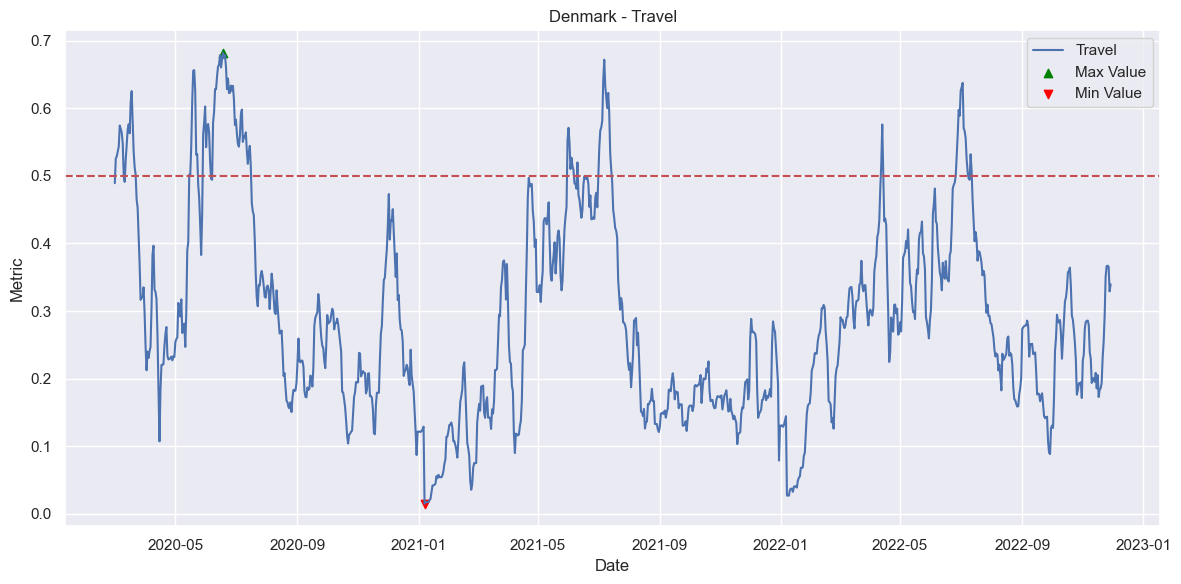

In [59]:
import numpy as np

# ... (previous code)

# Identify the index of the highest and lowest values
max_value_index = filtered_data['activity_quantile'].idxmax()
min_value_index = filtered_data['activity_quantile'].idxmin()

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for the chosen country and business type
ax.set_title(f'{country} - {business_type}')
ax.plot(filtered_data['ds'], filtered_data['activity_quantile'], label=business_type)

# Highlight the highest and lowest values with markers
ax.scatter(filtered_data['ds'][max_value_index], filtered_data['activity_quantile'][max_value_index], color='green', label='Max Value', marker='^')
ax.scatter(filtered_data['ds'][min_value_index], filtered_data['activity_quantile'][min_value_index], color='red', label='Min Value', marker='v')

ax.set_ylabel('Metric')
ax.set_xlabel('Date')
ax.legend()

# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')

plt.tight_layout()
plt.show()
plt.close()

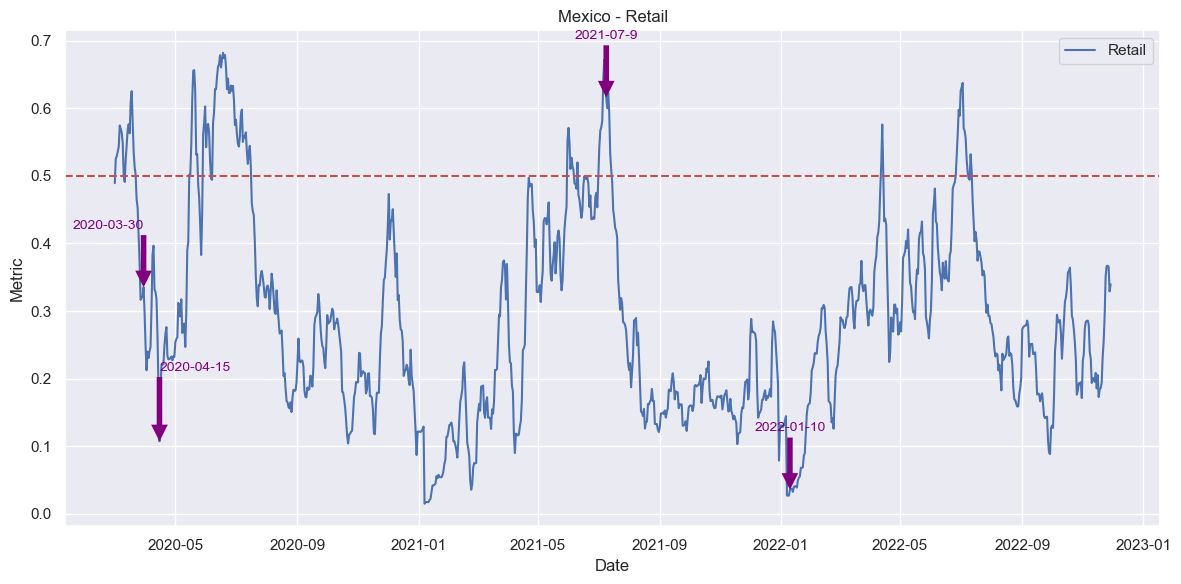

In [60]:
sns.color_palette("flare")

country = 'Mexico'
business_type = 'Retail'#'Public Good' 

highlight_date_str1 = '2020-03-30'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date1 = pd.to_datetime(highlight_date_str1)

# Find the corresponding index for the highlight date
highlight_index1 = filtered_data[filtered_data['ds'] == highlight_date1].index

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for the chosen country and business type
ax.set_title(f'{country} - {business_type}')
ax.plot(filtered_data['ds'], filtered_data['activity_quantile'], label=business_type)

# Highlight the specific date with an annotation
ax.annotate('2020-03-30', xy=(highlight_date1, filtered_data['activity_quantile'][highlight_index1]),
            xytext=(highlight_date1, filtered_data['activity_quantile'][highlight_index1] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple', horizontalalignment='right', verticalalignment='top')



highlight_date_str2 = '2020-04-15'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date2 = pd.to_datetime(highlight_date_str2)

# Find the corresponding index for the highlight date
highlight_index2 = filtered_data[filtered_data['ds'] == highlight_date2].index


# Highlight the specific date with an annotation
ax.annotate('2020-04-15', xy=(highlight_date2, filtered_data['activity_quantile'][highlight_index2]),
            xytext=(highlight_date2, filtered_data['activity_quantile'][highlight_index2] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple',verticalalignment='bottom' )#,rotation=180horizontalalignment='left', ,



highlight_date_str3 = '2021-07-9'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date3 = pd.to_datetime(highlight_date_str3)

# Find the corresponding index for the highlight date
highlight_index3 = filtered_data[filtered_data['ds'] == highlight_date3].index


# Highlight the specific date with an annotation
ax.annotate('2021-07-9', xy=(highlight_date3, filtered_data['activity_quantile'][highlight_index3]),
            xytext=(highlight_date3, filtered_data['activity_quantile'][highlight_index3] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple', horizontalalignment='center', verticalalignment='top')


highlight_date_str4 = '2022-01-10'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date4 = pd.to_datetime(highlight_date_str4)

# Find the corresponding index for the highlight date
highlight_index4 = filtered_data[filtered_data['ds'] == highlight_date4].index


# Highlight the specific date with an annotation
ax.annotate('2022-01-10', xy=(highlight_date4, filtered_data['activity_quantile'][highlight_index4]),
            xytext=(highlight_date4, filtered_data['activity_quantile'][highlight_index4] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple', horizontalalignment='center', verticalalignment='top')

ax.set_ylabel('Metric')
ax.set_xlabel('Date')
ax.legend()

# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')

plt.tight_layout()
plt.show()
plt.close()

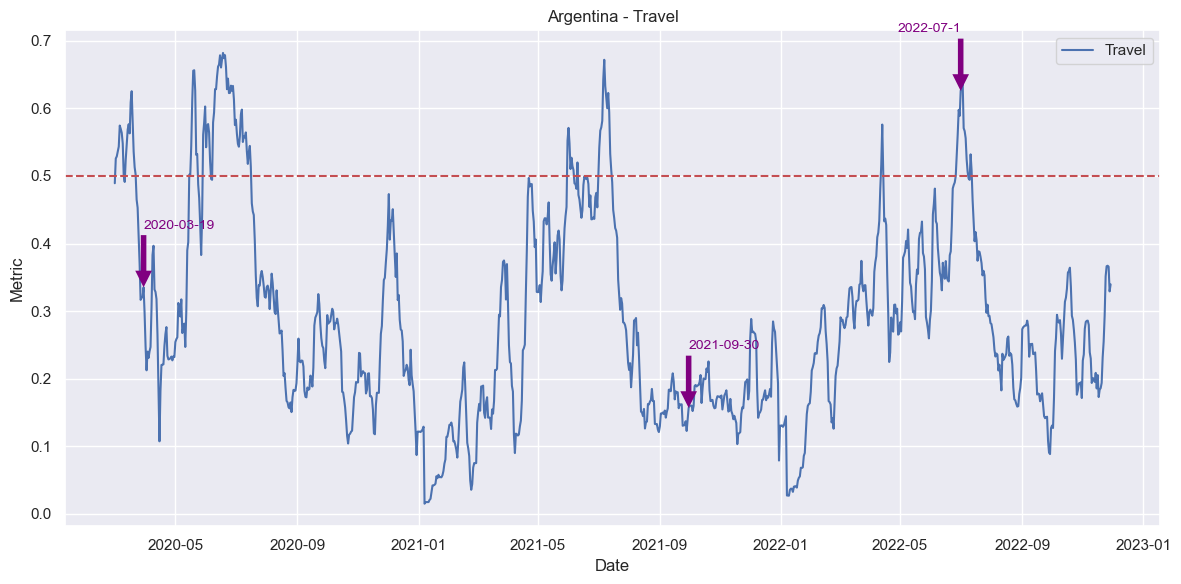

In [61]:
sns.color_palette("flare")

country = 'Argentina'
business_type = 'Travel'

highlight_date_str1 = '2020-03-30'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date1 = pd.to_datetime(highlight_date_str1)

# Find the corresponding index for the highlight date
highlight_index1 = filtered_data[filtered_data['ds'] == highlight_date1].index

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for the chosen country and business type
ax.set_title(f'{country} - {business_type}')
ax.plot(filtered_data['ds'], filtered_data['activity_quantile'], label=business_type)

# Highlight the specific date with an annotation
ax.annotate('2020-03-19', xy=(highlight_date1, filtered_data['activity_quantile'][highlight_index1]),
            xytext=(highlight_date1, filtered_data['activity_quantile'][highlight_index1] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple', horizontalalignment='left', verticalalignment='top')



highlight_date_str2 = '2021-09-30'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date2 = pd.to_datetime(highlight_date_str2)

# Find the corresponding index for the highlight date
highlight_index2 = filtered_data[filtered_data['ds'] == highlight_date2].index


# Highlight the specific date with an annotation
ax.annotate('2021-09-30', xy=(highlight_date2, filtered_data['activity_quantile'][highlight_index2]),
            xytext=(highlight_date2, filtered_data['activity_quantile'][highlight_index2] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple', horizontalalignment='left', verticalalignment='top')



highlight_date_str3 = '2022-07-1'  # Replace with your desired date

# Convert the date string to a datetime object
highlight_date3 = pd.to_datetime(highlight_date_str3)

# Find the corresponding index for the highlight date
highlight_index3 = filtered_data[filtered_data['ds'] == highlight_date3].index


# Highlight the specific date with an annotation
ax.annotate('2022-07-1', xy=(highlight_date3, filtered_data['activity_quantile'][highlight_index3]),
            xytext=(highlight_date3, filtered_data['activity_quantile'][highlight_index3] + 0.1),
            arrowprops=dict(facecolor='purple', edgecolor='none'),
            fontsize=10, color='purple', horizontalalignment='right', verticalalignment='top')

ax.set_ylabel('Metric')
ax.set_xlabel('Date')
ax.legend()

# Plotting the line y=0.5
ax.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')

plt.tight_layout()
plt.show()
plt.close()

In [78]:
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
cdf1['DayOfWeek'] = cdf1['date'].dt.dayofweek

# Iterate over the 'DayOfWeek' values
daytyp=[]

for day in cdf1['DayOfWeek']:
    if day < 5:
        day_type = 'weekday'
    else:
        day_type = 'weekend'
    daytyp.append(day_type)
    
    
cdf1['Daytype']= daytyp

weekday_df=cdf1[cdf1['Daytype']=='weekday']
weekend_df= cdf1[cdf1['Daytype']=='weekend']


KeyError: 'date'

NameError: name 'weekend_df' is not defined

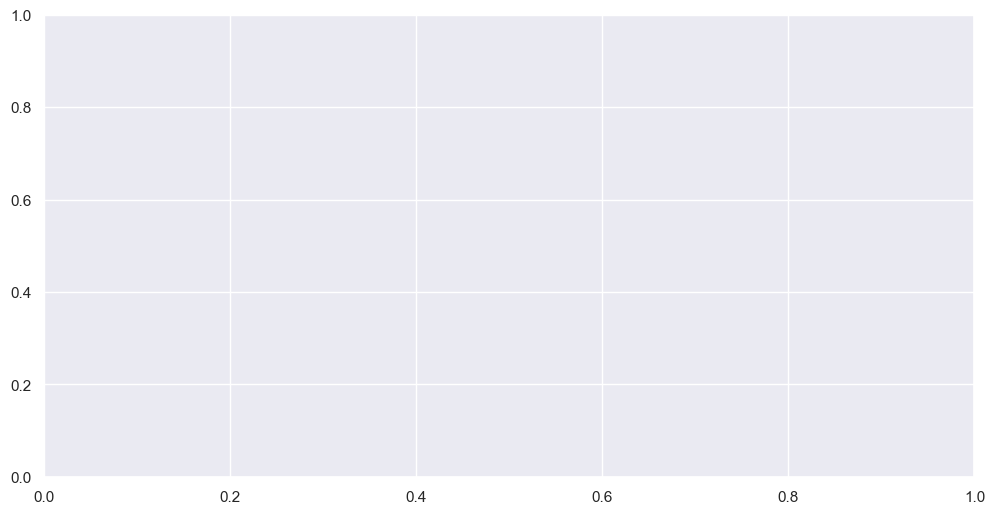

In [76]:
# Create time-series plots
countries = ['Saudi Arabia','Australia']
business_types = ['Travel']#, 'Travel', 'Restaurants'

fig, ax = plt.subplots(figsize=(12, 6))
for country in countries:
    for business in business_types:
        ex= weekend_df[(weekend_df['gadm_name'] == country) & (weekend_df['business_vertical'] == business)]
        ax.plot(ex['date'] , ex['activity_quantile'] , label=f'{country} - {business}')
        
ax.set_xlabel('Date')
ax.set_ylabel('Activity Quantile')
ax.set_title('Time-Series Figures for Travel Saudi Arabia & Australia in weekend')
plt.tight_layout()
ax.legend()        
plt.show()
plt.close()

NameError: name 'weekday_df' is not defined

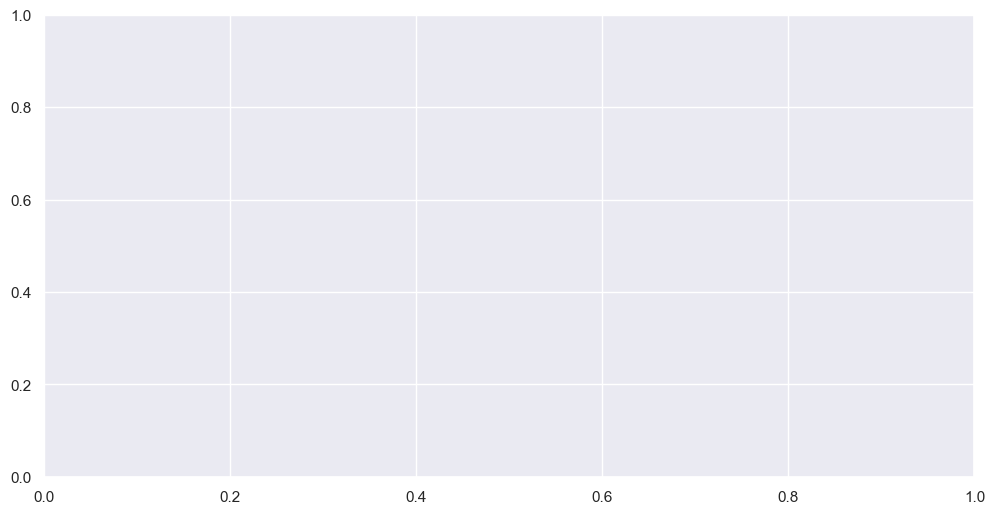

In [79]:
countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']
business_types = ['Travel']#, 'Travel', 'Restaurants',,'Local Events'
# Create time-series plots
fig, ax = plt.subplots(figsize=(12, 6))
for country in countries:
    for business in business_types:
        ex= weekday_df[(weekday_df['gadm_name'] == country) & (weekday_df['business_vertical'] == business)]
        ax.plot(ex['date'] , ex['activity_quantile'] , label=f'{country} - {business}')
        
        
        
ax.set_xlabel('Date')
ax.set_ylabel('Activity Quantile')
ax.set_title('Time-Series Figures for Travel Saudi Arabia & Australia in weekday')
plt.tight_layout()
ax.legend()        
plt.show()
plt.close()

NameError: name 'weekend_df' is not defined

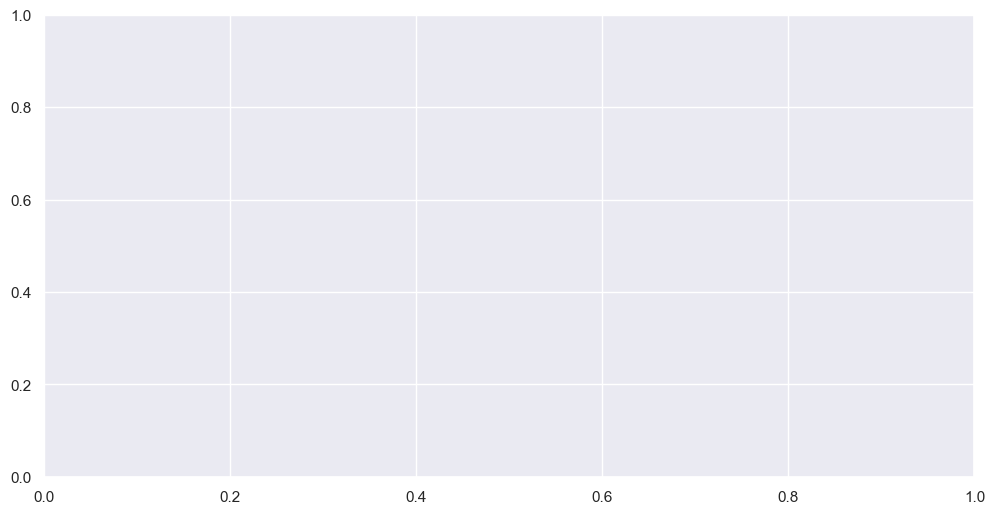

In [80]:
# Create time-series plots
countries = ['Saudi Arabia','Australia']
business_types = ['Travel']#, 'Travel', 'Restaurants'

fig, ax = plt.subplots(figsize=(12, 6))
for country in countries:
    for business in business_types:
        ex= weekend_df[(weekend_df['gadm_name'] == country) & (weekend_df['business_vertical'] == business)]
        ax.plot(ex['date'] , ex['activity_percentage'] , label=f'{country} - {business}')
        
ax.set_xlabel('Date')
ax.set_ylabel('Activity Percentage')
ax.set_title('Time-Series Figures for Travel Saudi Arabia & Australia in weekend')
plt.tight_layout()
ax.legend()        
plt.show()
plt.close()

In [ ]:
import shapefile as shp

In [ ]:
sns.set(style='whitegrid', palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [ ]:
shp_path =r"C:\Users\hadee\Desktop\intro project1\gadm41_GBR_shp\gadm41_GBR_4.shp"
sf = shp.Reader(shp_path)

In [ ]:
len(sf.shapes())

In [ ]:
sf.records()[1][2]

In [ ]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [ ]:
df = read_shapefile(sf)
df.shape

In [ ]:
df.sample(5)

In [ ]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
cdf1.info()

In [ ]:
import geopandas as gpd

In [ ]:
# Choose two specific days
selected_days = ['2020-04-27']
filtered_data = cdf1[cdf1['ds'].isin(selected_days)]

# Group by 'gadm0_name' and calculate mean or sum of 'activity_quantile'
grouped_data = filtered_data.groupby('gadm0_name')['activity_quantile'].mean().reset_index()

# Merge with GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(grouped_data, how='left', left_on='name', right_on='gadm0_name')

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='activity_quantile', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('April 2020 Activity Quantile by Country')
plt.show()

In [ ]:
import plotly.express as px

# Specify the specific date you're interested in
selected_date = '2020-04-27'

# Filter data for the selected date
selected_date_data = cdf[cdf['ds'] == selected_date]


# Assuming you have a GeoJSON file for your country (replace 'your_country.geojson' with the actual filename)
country_geojson = r"C:\Users\hadee\Desktop\intro-final\SAU-geo.json"

# Create choropleth map
fig = px.choropleth(
    cdf,  # Your DataFrame
    locations="gadm0_name",  # Adjust to the appropriate column in your dataset for regions
    geojson=country_geojson,
    color="activity_quantile",  # Adjust to the appropriate column in your dataset for color
    hover_name="gadm1_name",  # Adjust to the appropriate column in your dataset for hover text
    hover_data=["activity_quantile"],  # Adjust to the appropriate columns for additional hover data
    title="Activity Quantile by Regions",
)

# Adjust map appearance
fig.update_geos(fitbounds="locations", visible=False)

# Show the plot
fig.show()

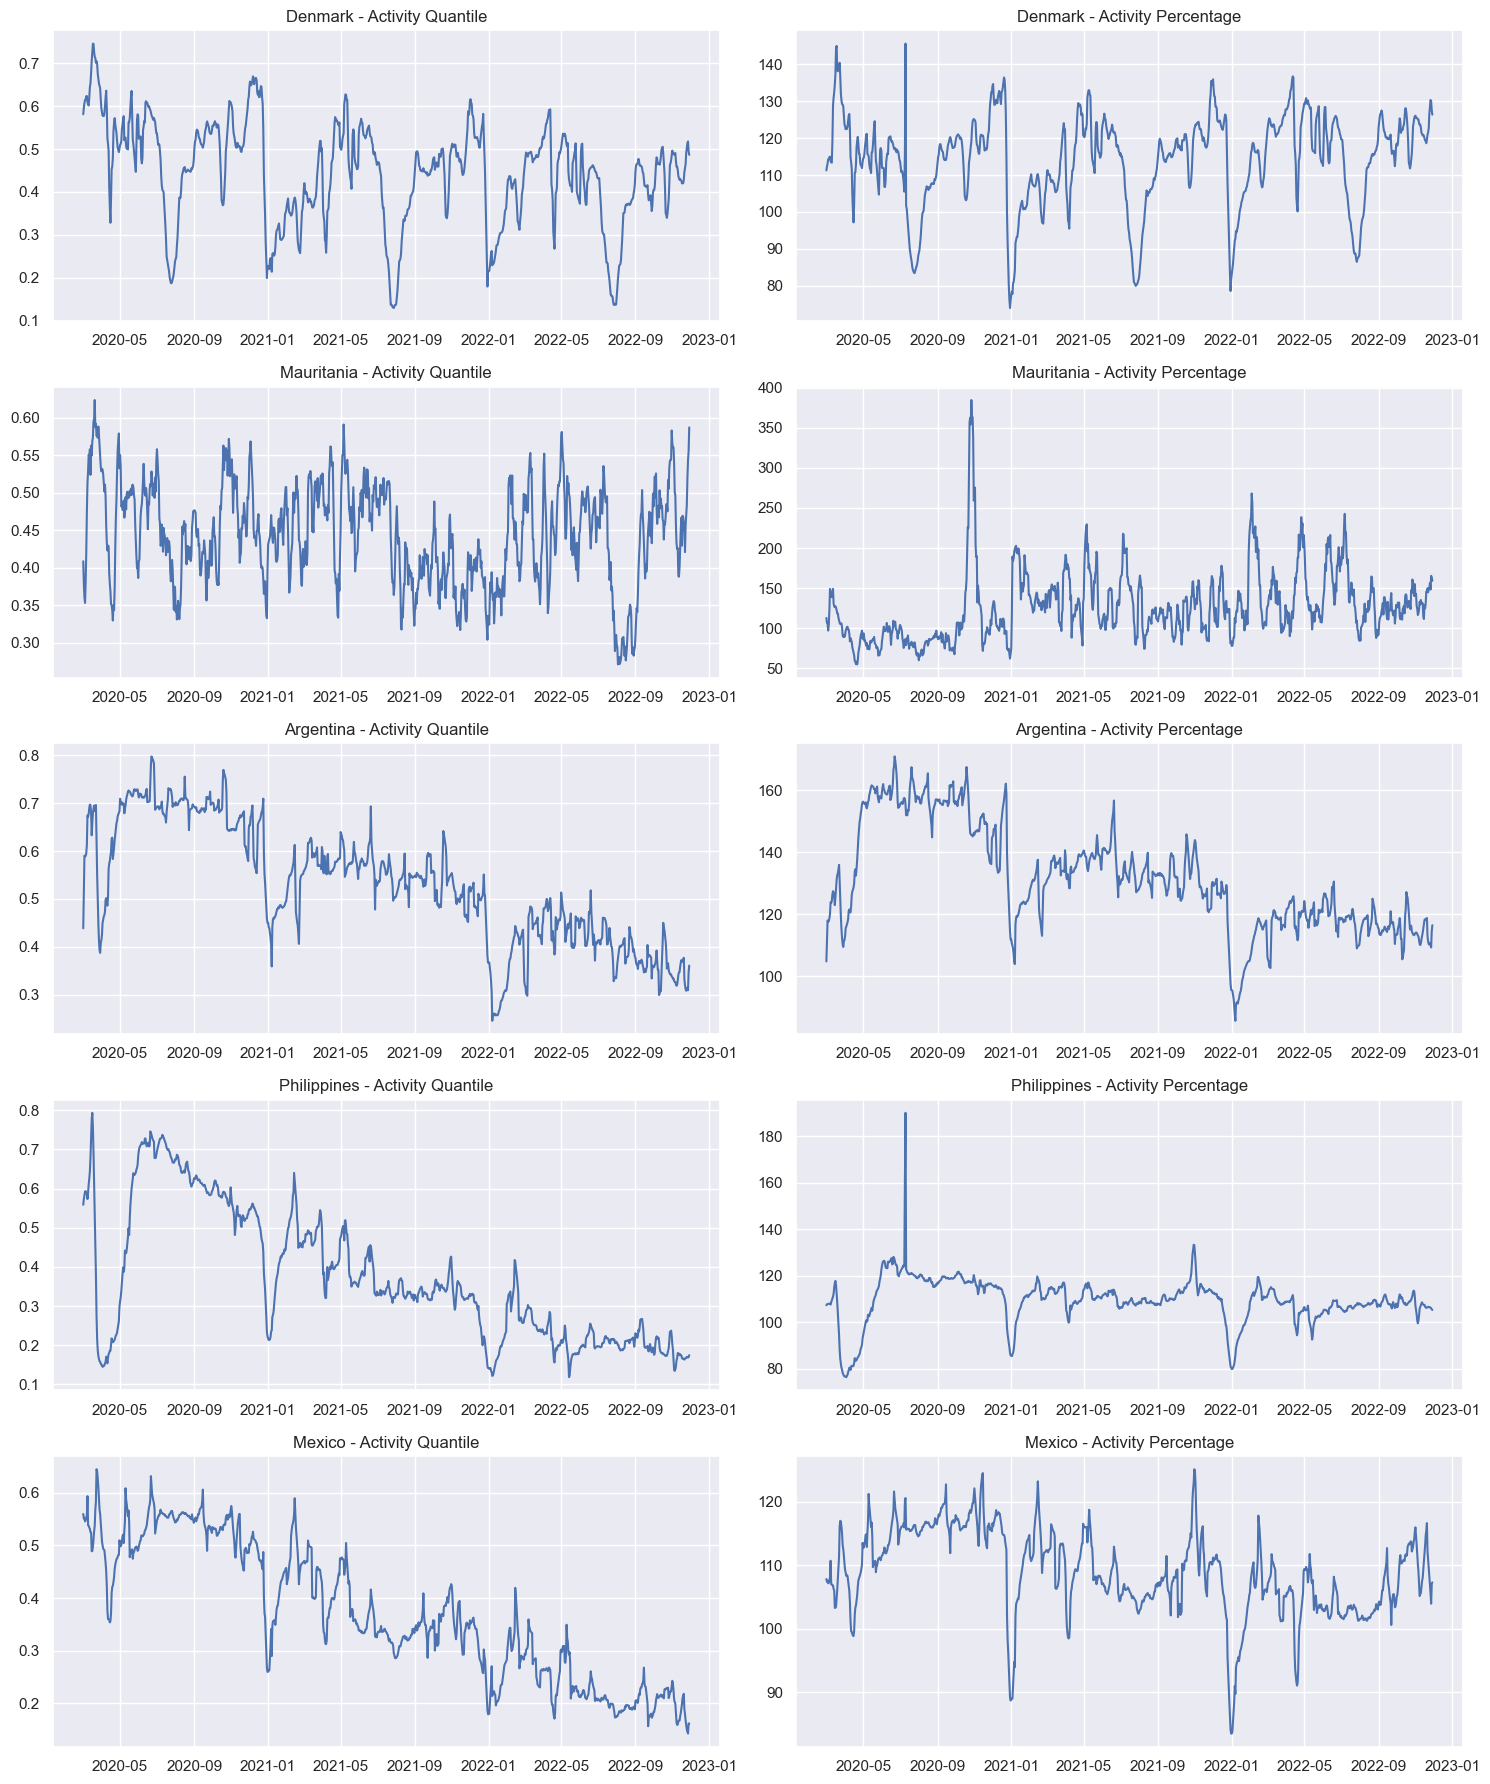

In [81]:
# Select countries
selected_countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']

# Filter data for selected countries
filtered_data = cdf1[cdf1['gadm0_name'].isin(selected_countries)]

# Group by 'ds' and calculate mean of 'activity_quantile' and 'activity_percentage'
grouped_data = filtered_data.groupby(['ds', 'gadm0_name'])[['activity_quantile', 'activity_percentage']].mean().reset_index()

# Plotting
fig, axes = plt.subplots(nrows=len(selected_countries), ncols=2, figsize=(15, 18), sharex=False)

for i, country in enumerate(selected_countries):
    country_data = grouped_data[grouped_data['gadm0_name'] == country]
    
    # Plot activity_quantile
    axes[i, 0].plot(country_data['ds'], country_data['activity_quantile'], label=country)
    axes[i, 0].set_title(f'{country} - Activity Quantile')
    
    # Plot activity_percentage
    axes[i, 1].plot(country_data['ds'], country_data['activity_percentage'], label=country)
    axes[i, 1].set_title(f'{country} - Activity Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Select 5-6 representative countries based on geo-location, size, average income, etc.
selected_countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']

data =cdf1

# Filter data for the selected countries
filtered_data = data[data['gadm0_name'].isin(selected_countries)]

# Group data by country and business vertical to identify changes in business trends
grouped_data = filtered_data.groupby(['gadm0_name', 'business_vertical']).agg({'activity_quantile': 'mean'})


In [ ]:
# Plotting changes in business trends for selected countries
for country in selected_countries:
    country_data = grouped_data.loc[country]
    country_data.plot(kind='bar', figsize=(4, 4), title=f'Business Trends in {country}', legend=True)
    plt.axhline(y=100, color='r', linestyle='--', label='y=100')
    plt.ylabel('Average Activity Percentage')
    plt.xlabel('Business Vertical')
    plt.show()
    plt.close()

In [ ]:
# Plotting changes in business trends for selected countries
for country in selected_countries:
    country_data = grouped_data.loc[country]
    country_data.plot(kind='bar', figsize=(4, 4), title=f'Business Trends in {country}', legend=True)
    plt.axhline(y=100, color='r', linestyle='--', label='y=100')
    plt.ylabel('Average Activity Quantile')
    plt.xlabel('Business Vertical')
    plt.show()

In [ ]:
num_countries = len(selected_countries)
num_cols = 2
num_rows = (num_countries + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

for idx, country in enumerate(selected_countries):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    country_data = grouped_data.loc[country]
    
    axes[row_idx, col_idx].bar(country_data.index, country_data['activity_quantile'])
    axes[row_idx, col_idx].axhline(y=100, color='r', linestyle='--', label='y=100')
    axes[row_idx, col_idx].set_title(f'Business Trends in {country}')
    axes[row_idx, col_idx].set_ylabel('Average Activity Percentage')
    axes[row_idx, col_idx].set_xlabel('Business Vertical')
    axes[row_idx, col_idx].legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Select 5-6 representative countries based on geo-location, size, average income, etc.
selected_countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']

data =cdf.copy()

# Filter data for the selected countries
filtered_data = data[data['gadm0_name'].isin(selected_countries)]

# Group data by country and business vertical to identify changes in business trends
grouped_data = filtered_data.groupby(['gadm0_name', 'business_vertical']).agg({'activity_quantile': 'mean'})

# Plotting all together
grouped_data.unstack().plot.bar(figsize=(15,8))
plt.xlabel("Countries ")
plt.ylabel('Average Activity Quantile')
plt.title('Average Activity Quantile by Day of the Week')
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.show()
plt.close()


In [ ]:
selected_countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']
temp = cdf[cdf["gadm0_name"].isin(selected_countries)]

In [ ]:
temp

In [ ]:
temp_monthly = temp.groupby(["gadm0_name", "business_vertical", "year", "month"])["activity_quantile"].apply('mean').reset_index()

# Forming a column combining all year_month
temp_monthly["year_month"] = temp_monthly['year'].astype('str') + temp_monthly['month'].apply(lambda x: '0'+str(x) if x<10 else x).astype('str')
temp_monthly["year_month"] = temp_monthly["year_month"]

temp_monthly.head(10)

NameError: name 'temp_monthly' is not defined

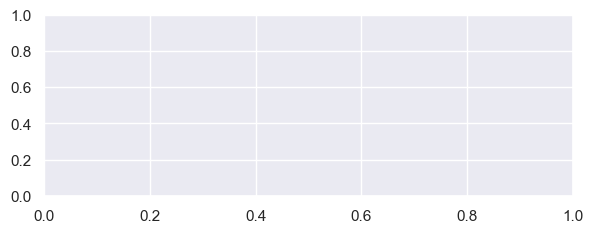

In [75]:
plt.figure(figsize = (15, 8))

plt.subplot(321)
country = "Denmark"
temp_ = temp_monthly[(temp_monthly['business_vertical'] == "Travel") & (temp_monthly['gadm0_name'] == country)].sort_values('year_month')
x = temp_['year_month']
y = temp_['activity_quantile']
plt.plot(x, y, 'o-', label=country)
# Plotting the line y=0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='y=5')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title(country)

plt.subplot(322)
country = "Mauritania"
temp_ = temp_monthly[(temp_monthly['business_vertical'] == "Travel") & (temp_monthly['gadm0_name'] == country)].sort_values('year_month')
x = temp_['year_month']
y = temp_['activity_quantile']
plt.plot(x, y, 'o-', label=country)
# Plotting the line y=0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title(country)

plt.subplot(323)
country = "Argentina"
temp_ = temp_monthly[(temp_monthly['business_vertical'] == "Travel") & (temp_monthly['gadm0_name'] == country)].sort_values('year_month')
x = temp_['year_month']
y = temp_['activity_quantile']
plt.plot(x, y, 'o-', label=country)
# Plotting the line y=0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title(country)

plt.subplot(324)
country = "Philippines"
temp_ = temp_monthly[(temp_monthly['business_vertical'] == "Travel") & (temp_monthly['gadm0_name'] == country)].sort_values('year_month')
x = temp_['year_month']
y = temp_['activity_quantile']
plt.plot(x, y, 'o-', label=country)
# Plotting the line y=0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title(country)

plt.subplot(325)
country = "Mexico"
temp_ = temp_monthly[(temp_monthly['business_vertical'] == "Travel") & (temp_monthly['gadm0_name'] == country)].sort_values('year_month')
x = temp_['year_month']
y = temp_['activity_quantile']
plt.plot(x, y, 'o-', label=country)
# Plotting the line y=0.5
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title(country)

plt.tight_layout()
plt.show()

IndexError: Column(s) ['activity_quantile'] already selected

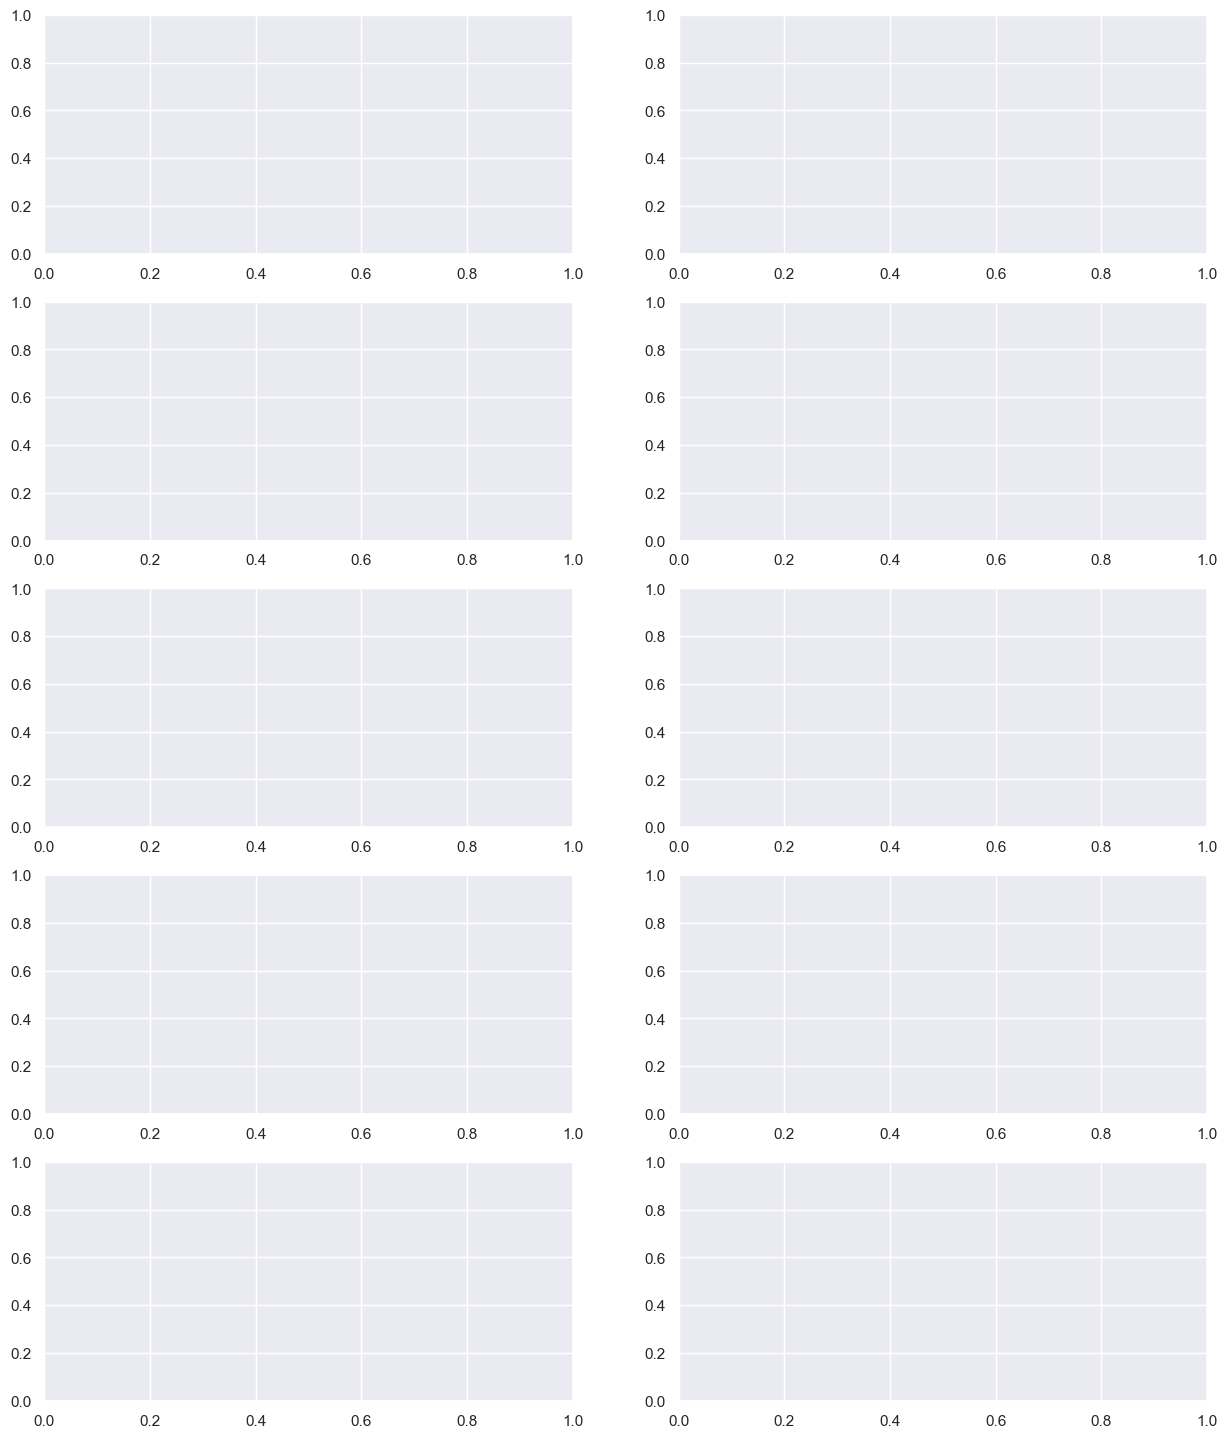

In [98]:
# Select countries
selected_countries = ['Denmark', 'Mauritania', 'Argentina', 'Philippines', 'Mexico']

# Filter data for selected countries
filtered_data = cdf1[cdf1['gadm0_name'].isin(selected_countries)]

# Group by 'ds' and calculate mean of 'activity_quantile' and 'activity_percentage'
grouped_data = filtered_data.groupby(['ds', 'gadm0_name'])[['activity_quantile']]

# Plotting
fig, axes = plt.subplots(nrows=len(selected_countries), ncols=2, figsize=(15, 18), sharex=False)

for i, country in enumerate(selected_countries):
    country_data = grouped_data[grouped_data['gadm0_name'] == country]
    
    # Plot activity_quantile
    axes[i, 0].plot(country_data['ds'], country_data['activity_quantile'], label=country)
    axes[i, 0].set_title(f'{country} - Activity Quantile')
    
    # Plot activity_percentage
    axes[i, 1].plot(country_data['ds'], country_data['activity_percentage'], label=country)
    axes[i, 1].set_title(f'{country} - Activity Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

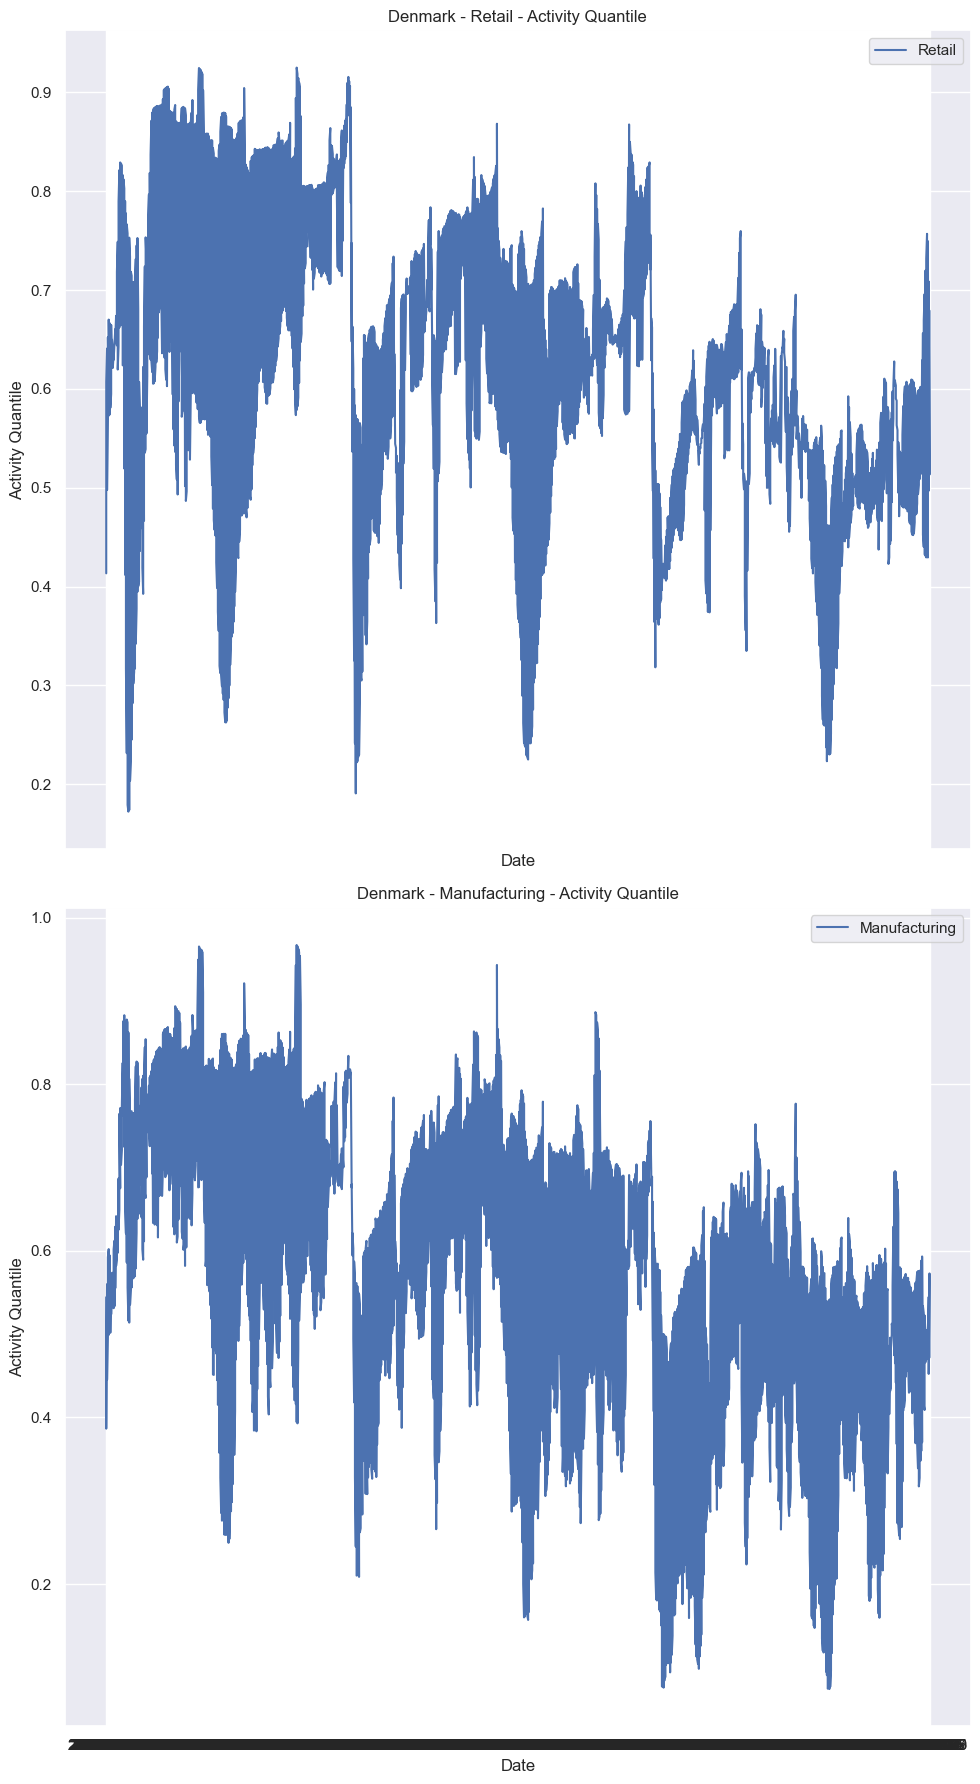

In [169]:
# Select countries and business verticals
selected_countries = ['Denmark' ,'Argentina' ]
business_verticals = ['Retail','Manufacturing']

# Filter data for selected countries and business verticals
filtered_data = cdf[(cdf['gadm0_name'].isin(selected_countries)) & (cdf['business_vertical'].isin(business_verticals))]

# Plotting
fig, axes = plt.subplots(nrows=len(business_verticals), figsize=(10, 18), sharex=True)

for i, business in enumerate(business_verticals):
    business_data = filtered_data[filtered_data['business_vertical'] == business]
    
    # Plot activity_quantile
    axes[i].plot(business_data['ds'], business_data['activity_quantile'], label=business)
    axes[i].set_title(f'{selected_countries[0]} - {business} - Activity Quantile')
    
    # Add labels and legend
    axes[i].set_ylabel('Activity Quantile')
    axes[i].set_xlabel('Date')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

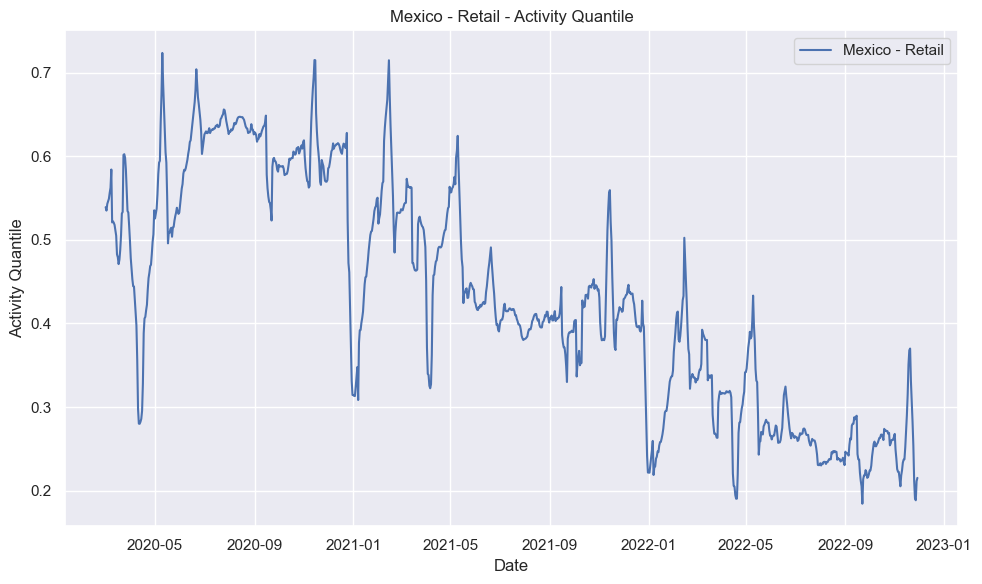

In [111]:
import matplotlib.pyplot as plt

# Select country and business vertical
selected_country = 'Mexico'
selected_business = 'Retail'

# Filter data for the selected country and business vertical
filtered_data = cdf1[(cdf1['gadm0_name'] == selected_country) & (cdf1['business_vertical'] == selected_business)]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot activity_quantile
ax.plot(filtered_data['ds'], filtered_data['activity_quantile'], label=f'{selected_country} - {selected_business}')
ax.set_title(f'{selected_country} - {selected_business} - Activity Quantile')
ax.set_ylabel('Activity Quantile')
ax.set_xlabel('Date')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()